## 读取数据

In [30]:
import pandas as pd

# 读取文件
file_path = "WY_计算随访时间_cataract_更新的截止时间.csv"
df = pd.read_csv(file_path)

# ===========================================
# 字段标准化映射表（原始字段 → 统一字段）
# ===========================================
column_mapping = {
    # 1. 人口学与社会经济学特征
    "sex": "sex",
    "ethnic_background": "ethnic_background",
    "ethnic_l": "ethnic_l",
    "ethnic": "ethnic",
    "education_bl": "education_baseline",
    "age_bl": "age_baseline",

    # 2. 生活方式与行为因素
    "csmoking_bl": "smoking_status_baseline",
    
    "alcohol_freq_bl": "alcohol_frequency_baseline",
    "alcohol_bl": "alcohol_frequency_baseline1",
    "sleep_dur_bl": "sleep_duration_baseline",

    # 3. 人体测量学指标
    "bmi_bl": "bmi_baseline",
    "obesity": "obesity_status",

    # 4. 基线健康状况
    "diabetes_bl": "diabetes_baseline",
    "hypertension_bl": "hypertension_baseline",
    "heart_attack_bl": "myocardial_infarction_baseline",
    "heart_failure_bl": "heart_failure_baseline",
    "stroke_bl": "stroke_baseline",
    "kidney_stone_bl": "kidney_stone_baseline",
    "depression_bl": "depression_baseline",
    "cancer_bl": "cancer_baseline",
    "heart_disease": "heart_disease_composite",

    # 5. 眼科疾病基线状态
    "amd_bl": "amd_baseline",
    "amd_bl1": "amd_baseline1",
    "amd_blt": "amd_baseline2",
    "cataract_bl": "cataract_baseline",
    "glaucoma_bl": "glaucoma_baseline",
    "gla_blt": "glaucoma_baseline1",
    "diabetic_eye_bl": "diabetic_retinopathy_baseline",
    "dr_bl": "diabetic_retinopathy_baseline",
    "dr_blt": "diabetic_retinopathy_baseline",

    # 6. 实验室检测指标
    "hba1c_bl": "hba1c_baseline",
    "total_cholesterol": "total_cholesterol",
    "ldl_cholesterol": "ldl_cholesterol",
    "hdl_cholesterol": "hdl_cholesterol",
    "triglycerides": "triglycerides",

    # 7. 脂肪酸代谢指标
    "total_fa": "fatty_acids_total",
    "n3fa": "fatty_acids_n3",
    "n6fa": "fatty_acids_n6",
    "pufa": "fatty_acids_pufa",
    "mufa": "fatty_acids_mufa",
    "sfa": "fatty_acids_sfa",
    "la": "fatty_acids_la",
    "dha": "fatty_acids_dha",

    # 8. 遗传风险评分
    "n3fa_grs": "grs_n3fa",
    "n6fa_grs": "grs_n6fa",
    "pufa_grs": "grs_pufa",
    "tfa_grs": "grs_total_fa",

    # 9. 年龄分层分类
    "age_layer2": "age_quantile_2",
    "age50": "age_threshold_50",
    "age57": "age_threshold_57",
    "age60": "age_threshold_60",

    # 10. 随访与时间变量
    "date_interview": "interview_date",
    "date_interview_time": "interview_date",
    "lastdate": "last_followup_date",
    "followup_cataract_yrs": "followup_duration_cataract_yrs",
    "followup_cataract": "followup_duration_cataract",
    "followup_cataract_182": "followup_duration_cataract_182",
    "followdate_cataract": "followup_date_cataract",
    "eligible": "eligible_status",

    # 11. 疾病发病与结局事件
    "amd_onset": "amd_onset_date",
    "amd_onset_date": "amd_onset_date",
    "amd_onset_time": "amd_onset_date",
    "amd_days": "amd_time_to_event_days",
    "cataract_onset": "cataract_onset_date",
    "cataract_onset_date": "cataract_onset_date",
    "cataract_days": "cataract_time_to_event_days",
    "incident_cataract": "cataract_incident",
    "diabetic_eye_onset": "diabetic_eye_onset_date",
    "diabetic_eye_onset_date": "diabetic_eye_onset_date",
    "diabetic_eye_days": "diabetic_eye_time_to_event_days",
    "glaucoma_onset": "glaucoma_onset_date",
    "glaucoma_onset_date": "glaucoma_onset_date",
    "glaucoma_days": "glaucoma_time_to_event_days",

    # 12. 模型输出
    "amd_prediction": "amd_risk_prediction",
    "cataract_prediction": "cataract_risk_prediction",
    "diabetic_eye_prediction": "diabetic_eye_risk_prediction",
    "glaucoma_prediction": "glaucoma_risk_prediction",

    # 13. 数据管理标识
    "f_eid": "participant_id",
    "analysis_fa": "analysis_flag_fatty_acids",
    "metabolomic_age": "metabolomic_age",
}

# ==================================================
# 自动将 df 的列名映射到新名称（若存在）
# ==================================================
df = df.rename(columns={orig: new for orig, new in column_mapping.items() if orig in df.columns})

# 输出前 5 行，确认成功读取
print(df.head())

# 输出列名，确认字段统一
print("\n统一后的字段名：")
print(df.columns.tolist())


   ethnic_background  sex  education_baseline  sleep_duration_baseline  \
0               1001    1                   1                        7   
1               1002    1                   3                        7   
2               1001    1                   0                        7   
3               1001    0                   5                        8   
4               1001    1                   0                       12   

   smoking_status_baseline  alcohol_frequency_baseline  bmi_baseline  \
0                      2.0                         3.0          27.2   
1                      2.0                         3.0          22.8   
2                      0.0                         2.0          28.6   
3                      0.0                         5.0          34.0   
4                      2.0                         6.0          20.0   

   age_baseline  diabetes_baseline  cancer_baseline  ...  \
0            43                  0              0.0  ...   
1 

## 数据解析

步骤0 - 初始人数: 174,614 人

【步骤1 - 排除随访时间 < 365 天】
排除前: 174,614 人
排除后: 164,014 人
减少人数: 10,600 人

【步骤1.5 - 排除 alcohol_frequency_baseline 缺失】
alcohol_frequency_baseline 缺失人数: 241
筛选前: 164,014 人
筛选后: 163,773 人
减少人数: 241 人

【步骤2 - 筛选脂肪酸数据完整的人群】
脂肪酸列: ['fatty_acids_total', 'fatty_acids_n3', 'fatty_acids_n6', 'fatty_acids_pufa', 'fatty_acids_mufa', 'fatty_acids_sfa', 'fatty_acids_la', 'fatty_acids_dha']
筛选前: 163,773 人
筛选后: 35,534 人
减少人数: 128,239 人

【步骤3 - 筛选最终有效人群】
保留: >=365天（晚期发病组）和空值（未发病组）
排除: <365天（早期发病组）
筛选前: 35,534 人
筛选后: 35,534 人
减少人数: 0 人

【步骤4 - 创建分组变量】
发病组(>=365天): 3,690 人
对照组(空值): 31,844 人
总计: 35,534 人
发病组内：早期(<365天)=0，晚期(>=365天)=3,690

【倾向评分模型】
模型系数: {'age_baseline': np.float64(1.0106833758038232), 'sex': np.float64(-0.15158288026680145)}
模型截距: -2.5109
模型样本数: 35,534

【OR值解读】
age_baseline: OR=2.75
sex: OR=0.86

【开始1:1最近邻匹配】
卡尺值: 0.1
成功匹配对数: 3690
匹配后总样本数: 7,380
病例组: 3,690
对照组: 3,690

【匹配质量评估 - 标准化均数差（SMD）】
age_baseline:
 匹配前SMD: 0.7835 ❌
 匹配后SMD: 0.0000 ✅
sex:
 匹配前SMD: 0.1153 ❌
 匹配后SMD: 

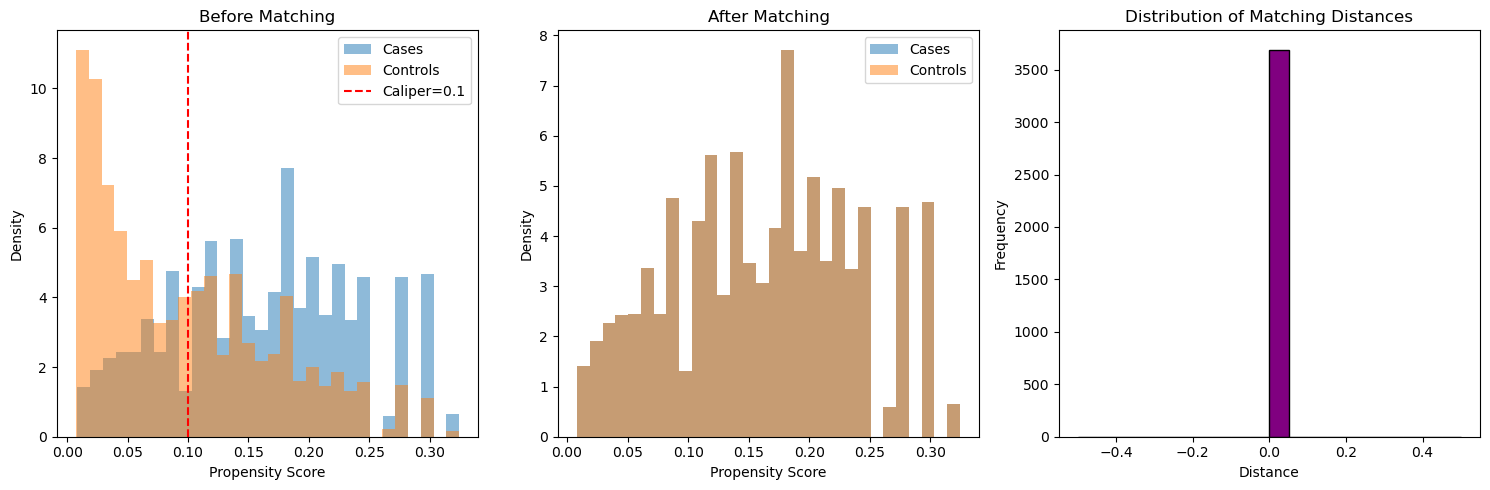

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# =================================================
# 1. 数据准备与分组
# =================================================
# 步骤0: 打印初始人数（基于最原始的数据）
initial_n = len(df)
print(f"=" * 65)
print(f"步骤0 - 初始人数: {initial_n:,} 人")
print("=" * 65)

# 创建二分类变量：是否发病
cataract_days_col = 'cataract_time_to_event_days'

if cataract_days_col not in df.columns:
    print(f"❌ 错误：列 '{cataract_days_col}' 不存在！")
else:
    # =================================================
    # =================================================
    # 步骤1: 排除随访时间不足 1年的人
    # =================================================
    print("\n【步骤1 - 排除随访时间 < 365 天】")

    pre_step1_n = len(df)

    if "followup_duration_cataract" not in df.columns:
        raise ValueError("❌ 缺少 followup_duration_cataract 列，无法进行随访时间筛选")

    # 关键点：只根据随访时间筛选，不碰 event time
    df_step1 = df.loc[
    df["followup_duration_cataract"].notna() &
    (df["followup_duration_cataract"] >= 365)
    ].copy()

    after_step1_n = len(df_step1)
    removed_step1_n = pre_step1_n - after_step1_n

    print(f"排除前: {pre_step1_n:,} 人")
    print(f"排除后: {after_step1_n:,} 人")
    print(f"减少人数: {removed_step1_n:,} 人")
    print("=" * 65)

    # =================================================
    # 步骤1.5: 排除 alcohol_frequency_baseline 为空
    # =================================================
    print("\n【步骤1.5 - 排除 alcohol_frequency_baseline 缺失】")

    pre_step15_n = len(df_step1)

    if "alcohol_frequency_baseline" in df_step1.columns:
        n_missing_alcohol = df_step1["alcohol_frequency_baseline"].isna().sum()
        
        print(f"alcohol_frequency_baseline 缺失人数: {n_missing_alcohol:,}")
        
        df_step15 = df_step1.dropna(
            subset=["alcohol_frequency_baseline"]
        ).copy()
        
        after_step15_n = len(df_step15)
        removed_step15_n = pre_step15_n - after_step15_n
        
        print(f"筛选前: {pre_step15_n:,} 人")
        print(f"筛选后: {after_step15_n:,} 人")
        print(f"减少人数: {removed_step15_n:,} 人")
    else:
        print("⚠️  警告：未找到 alcohol_frequency_baseline 列，跳过该步骤")
        df_step15 = df_step1.copy()

    print("=" * 65)

    # =================================================
    
    # 步骤2: 去掉脂肪酸数据不完整的，创建 df_fa_complete
    # =================================================
    print("\n【步骤2 - 筛选脂肪酸数据完整的人群】")
    
    # 定义脂肪酸核心列
    fa_core_cols = ['fatty_acids_total', 'fatty_acids_n3', 'fatty_acids_n6',
                    'fatty_acids_pufa', 'fatty_acids_mufa', 'fatty_acids_sfa',
                    'fatty_acids_la', 'fatty_acids_dha']
    
    # 检查哪些列实际存在
    existing_fa_core = [col for col in fa_core_cols if col in df_step15.columns]
    
    if not existing_fa_core:
        print("⚠️  警告：未找到任何脂肪酸数据列！")
    
    pre_step2_n = len(df_step15)
    
    # 剔除脂肪酸数据不完整的记录 
    df_fa_complete = df_step15.dropna(subset=existing_fa_core).copy()
    
    after_step2_n = len(df_fa_complete)
    removed_step2_n = pre_step2_n - after_step2_n
    
    print(f"脂肪酸列: {existing_fa_core}")
    print(f"筛选前: {pre_step2_n:,} 人")
    print(f"筛选后: {after_step2_n:,} 人")
    print(f"减少人数: {removed_step2_n:,} 人")
    print("=" * 65)
    
    # =================================================
    # 步骤3: 筛选有效人群（只保留>=183天和空值）
    # =================================================
    print("\n【步骤3 - 筛选最终有效人群】")
    print("保留: >=365天（晚期发病组）和空值（未发病组）")
    print("排除: <365天（早期发病组）")
    
    pre_step3_n = len(df_fa_complete)
    
    # 创建筛选掩码：只保留 >=365 或 空值
    valid_mask = (
        (df_fa_complete[cataract_days_col] >= 365) | 
        (df_fa_complete[cataract_days_col].isna())
    )
    df_fa_complete = df_fa_complete[valid_mask].copy()
    
    after_step3_n = len(df_fa_complete)
    removed_step3_n = pre_step3_n - after_step3_n
    
    print(f"筛选前: {pre_step3_n:,} 人")
    print(f"筛选后: {after_step3_n:,} 人")
    print(f"减少人数: {removed_step3_n:,} 人")
    print("=" * 65)
    
    # =================================================
    # 步骤4: 创建分组变量并准备PSM数据
    # =================================================
    print("\n【步骤4 - 创建分组变量】")
    
    # 创建二分类分组变量
    df_fa_complete['cataract_event'] = np.where(
        df_fa_complete[cataract_days_col] > 0,
        1,  # 发病组（>=365天）
        0   # 未发病组（空值）
    )
    
    # 复制数据用于PSM分析
    df_psm = df_fa_complete.copy()
    
    # 定义PSM分组变量
    df_psm['cataract_group'] = df_psm['cataract_event']
    
    # 检查分组样本量
    n_case = df_psm['cataract_group'].sum()
    n_control = (df_psm['cataract_group'] == 0).sum()
    
    print(f"发病组(>=365天): {n_case:,} 人")
    print(f"对照组(空值): {n_control:,} 人")
    print(f"总计: {len(df_psm):,} 人")
    print("=" * 65)
    
    # 统计发病组内时间分布
    days_series = df_psm.loc[df_psm['cataract_event'] == 1, cataract_days_col]
    early_count = (days_series < 365).sum()
    late_count = (days_series >= 365).sum()
    print(f"发病组内：早期(<365天)={early_count:,}，晚期(>=365天)={late_count:,}")
    print("=" * 65)
    
   # =================================================
    # 5. 倾向评分计算
    # =================================================
    # 匹配变量：年龄、性别
    match_vars = ['age_baseline', 'sex']

    # 检查缺失值并清理
    missing_count = df_psm[match_vars].isnull().sum()
    if missing_count.any():
        print(f"\n⚠️  发现缺失值:\n{missing_count}")
        print("正在剔除含缺失值的记录...")
        clean_mask = df_psm[match_vars].notna().all(axis=1)
        pre_clean_n = len(df_psm)
        df_psm = df_psm[clean_mask].copy()
        after_clean_n = len(df_psm)
        removed_clean_n = pre_clean_n - after_clean_n
        print(f"清理前: {pre_clean_n:,} 人")
        print(f"清理后: {after_clean_n:,} 人")
        print(f"减少人数: {removed_clean_n:,} 人")

    # 对 df_psm 的 sex 列进行编码（关键修复）
    if df_psm['sex'].dtype == 'object':
        df_psm['sex'] = df_psm['sex'].astype(str).str.strip()
        df_psm['sex'] = df_psm['sex'].map({'Female': 0, 'Male': 1})
    elif isinstance(df_psm['sex'].dtype, pd.CategoricalDtype):
        df_psm['sex'] = df_psm['sex'].cat.codes

    # 提取特征和标签
    # X 是 年龄 + 性别 
    # y 是 是否发病
    X = df_psm[match_vars].copy()
    y = df_psm['cataract_group']

    # 标准化连续变量
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 逻辑回归
    ps_model = LogisticRegression(random_state=42, max_iter=1000)
    ps_model.fit(X_scaled, y)

    # 预测倾向评分（所有人）
    df_psm['propensity_score'] = ps_model.predict_proba(X_scaled)[:, 1]

    # 保存倾向评分模型信息
    model_info = {
        'variables': match_vars,
        'coefficients': dict(zip(['age_baseline', 'sex'], ps_model.coef_[0])),
        'intercept': ps_model.intercept_[0],
        'n_samples': len(df_psm)
    }

    print("\n【倾向评分模型】")
    print(f"模型系数: {model_info['coefficients']}")
    print(f"模型截距: {model_info['intercept']:.4f}")
    print(f"模型样本数: {model_info['n_samples']:,}")

    # 计算OR值
    import math
    print("\n【OR值解读】")
    for var, coef in model_info['coefficients'].items():
        or_value = math.exp(coef)
        print(f"{var}: OR={or_value:.2f}")
    # =================================================
    # 6. 1:1最近邻匹配（卡尺0.1）
    # =================================================
    case_df = df_psm[df_psm['cataract_group'] == 1].copy()
    control_df = df_psm[df_psm['cataract_group'] == 0].copy()
    
    print("\n" + "=" * 65)
    print("【开始1:1最近邻匹配】")
    print(f"卡尺值: 0.1")
    print("=" * 65)
    
    # 计算距离矩阵
    case_ps = case_df['propensity_score'].values.reshape(-1, 1)
    control_ps = control_df['propensity_score'].values.reshape(-1, 1)
    distances = cdist(case_ps, control_ps, metric='euclidean')
    
    # 执行匹配
    matched_pairs = []
    used_controls = set()
    
    for i, case_id in enumerate(case_df['participant_id']):
        case_score = case_df.iloc[i]['propensity_score']
        
        # 找到最近邻
        sorted_indices = np.argsort(distances[i])
        for j in sorted_indices:
            control_id = control_df.iloc[j]['participant_id']
            
            if control_id not in used_controls:
                distance = distances[i, j]
                # 卡尺判断
                if abs(case_score - control_df.iloc[j]['propensity_score']) < 0.1:
                    matched_pairs.append({
                        'case_id': case_id,
                        'control_id': control_id,
                        'distance': distance,
                        'case_ps': case_score,
                        'control_ps': control_df.iloc[j]['propensity_score']
                    })
                    used_controls.add(control_id)
                    break
    
    print(f"成功匹配对数: {len(matched_pairs)}")
    
    if len(matched_pairs) < len(case_df):
        print(f"⚠️  警告: 有 {len(case_df) - len(matched_pairs)} 例病例未找到匹配对照")
    
    # 创建匹配数据集
    matched_case_ids = [p['case_id'] for p in matched_pairs]
    matched_control_ids = [p['control_id'] for p in matched_pairs]
    
    df_matched = df_psm[df_psm['participant_id'].isin(matched_case_ids + matched_control_ids)].copy()
    
    # 添加匹配标识
    df_matched['matched_pair_id'] = df_matched['participant_id'].map(
        {**{p['case_id']: i for i, p in enumerate(matched_pairs)},
         **{p['control_id']: i for i, p in enumerate(matched_pairs)}}
    )
    df_matched['is_case'] = df_matched['participant_id'].isin(matched_case_ids).astype(int)
    
    print(f"匹配后总样本数: {len(df_matched):,}")
    print(f"病例组: {len(matched_case_ids):,}")
    print(f"对照组: {len(matched_control_ids):,}")
    print("=" * 65)
    
    # =================================================
    # 7. 匹配质量评估（SMD）
    # =================================================
    print("\n" + "=" * 65)
    print("【匹配质量评估 - 标准化均数差（SMD）】")
    print("=" * 65)
    
    def calculate_smd(group1, group2, continuous=True):
        """计算标准化均数差"""
        if continuous:
            mean_diff = group1.mean() - group2.mean()
            pooled_sd = np.sqrt(((len(group1)-1)*group1.std()**2 + 
                                 (len(group2)-1)*group2.std()**2) / 
                                (len(group1)+len(group2)-2))
            return abs(mean_diff) / pooled_sd
        else:
            p1 = group1.mean()
            p2 = group2.mean()
            return abs(p1 - p2) / np.sqrt((p1*(1-p1) + p2*(1-p2)) / 2)
    
    smd_results = []
    for var in match_vars:
        # 匹配前
        case_before = df_psm[df_psm['cataract_group'] == 1][var]
        control_before = df_psm[df_psm['cataract_group'] == 0][var]
        smd_before = calculate_smd(case_before, control_before, 
                                   continuous=(var != 'sex'))
        
        # 匹配后
        case_after = df_matched[df_matched['is_case'] == 1][var]
        control_after = df_matched[df_matched['is_case'] == 0][var]
        smd_after = calculate_smd(case_after, control_after, 
                                  continuous=(var != 'sex'))
        
        print(f"{var}:")
        print(f" 匹配前SMD: {smd_before:.4f} {'✅' if smd_before < 0.1 else '❌'}")
        print(f" 匹配后SMD: {smd_after:.4f} {'✅' if smd_after < 0.1 else '❌'}")
        
        smd_results.append({
            'variable': var,
            'smd_before': smd_before,
            'smd_after': smd_after
        })
    
    # =================================================
    # 8. 亚组分析（保持不变）
    # =================================================
    # 按年龄分层
    print("\n" + "=" * 65)
    print("【亚组分析 - 按年龄分层】")
    print("=" * 65)
    
    df_matched['age_group'] = pd.cut(
        df_matched['age_baseline'], 
        bins=[0, 50, 60, 70, 100], 
        labels=['<50', '50-59', '60-69', '≥70']
    )
    
    age_subgroup = []
    for age_grp, group in df_matched.groupby('age_group'):
        n_case = group['is_case'].sum()
        n_control = (group['is_case'] == 0).sum()
        ratio = n_case / n_control if n_control > 0 else np.inf
        
        print(f"{age_grp}岁组: 病例{n_case:,}，对照{n_control:,}，比例{ratio:.2f}")
        
        age_subgroup.append({
            'age_group': str(age_grp),
            'n_cases': n_case,
            'n_controls': n_control,
            'ratio': ratio
        })
    
    # 按性别分层
    print("\n" + "=" * 65)
    print("【亚组分析 - 按性别分层】")
    print("=" * 65)
    
    sex_subgroup = []
    for sex_val, group in df_matched.groupby('sex'):
        sex_label = 'Female' if sex_val == 0 else 'Male'
        n_case = group['is_case'].sum()
        n_control = (group['is_case'] == 0).sum()
        ratio = n_case / n_control if n_control > 0 else np.inf
        
        print(f"{sex_label}: 病例{n_case:,}，对照{n_control:,}，比例{ratio:.2f}")
        
        sex_subgroup.append({
            'sex': sex_label,
            'n_cases': n_case,
            'n_controls': n_control,
            'ratio': ratio
        })
    
    # =================================================
    # 9. 可视化（保持不变）
    # =================================================
    plt.figure(figsize=(15, 5))
    
    # 倾向评分分布  
    plt.subplot(1, 3, 1)
    plt.hist(df_psm[df_psm['cataract_group']==1]['propensity_score'], 
             alpha=0.5, label='Cases', bins=30, density=True)
    plt.hist(df_psm[df_psm['cataract_group']==0]['propensity_score'], 
             alpha=0.5, label='Controls', bins=30, density=True)
    plt.axvline(x=0.1, color='red', linestyle='--', label='Caliper=0.1')
    plt.title("Before Matching")
    plt.xlabel("Propensity Score")
    plt.ylabel("Density")
    plt.legend()
    
    # 匹配后分布
    plt.subplot(1, 3, 2)
    plt.hist(df_matched[df_matched['is_case']==1]['propensity_score'], 
             alpha=0.5, label='Cases', bins=30, density=True)
    plt.hist(df_matched[df_matched['is_case']==0]['propensity_score'], 
             alpha=0.5, label='Controls', bins=30, density=True)
    plt.title("After Matching")
    plt.xlabel("Propensity Score")
    plt.ylabel("Density")
    plt.legend()
    
    # 匹配对距离分布
    distances = [p['distance'] for p in matched_pairs]
    plt.subplot(1, 3, 3)
    plt.hist(distances, bins=20, color='purple', edgecolor='black')
    plt.title("Distribution of Matching Distances")
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

## 笨宝宝看这里 (～￣(OO)￣)ブ

In [34]:
import pandas as pd
from lifelines import CoxPHFitter

# ==============================================================================
# 1. 假设你已经完成了读取和映射
# ==============================================================================
# df = pd.read_csv(...) 
# df = df.rename(...)
# 建立副本
df_model = df.copy()

# ==============================================================================
# 2. 准备 Model 3 的所有协变量
# ==============================================================================
vars_model1 = ["age_baseline", "sex", "ethnic_background"]

vars_model2 = vars_model1 + [
    "bmi_baseline", 
    "alcohol_frequency_baseline", 
    "smoking_status_baseline", 
    "education_baseline"
]

vars_model3 = vars_model2 + [
    "diabetes_baseline",
    "hypertension_baseline",
    "heart_disease_composite",
    "glaucoma_baseline",
    "depression_baseline"
]

# ==============================================================================
# 3. 构建核心变量与交互项
# ==============================================================================
core_var = "fatty_acids_n3"

# 构建交互项
df_model['interaction_n3fa_age'] = df_model['fatty_acids_n3'] * df_model['age_baseline']

# 最终入模变量
final_covariates = list(set([core_var, 'interaction_n3fa_age'] + vars_model3))

# ==============================================================================
# 4. 数据清洗与提取
# ==============================================================================
time_col = "followup_duration_cataract_yrs"
event_col = "cataract_incident"
cols_to_use = final_covariates + [time_col, event_col]

# 检查缺失列
missing = [c for c in cols_to_use if c not in df_model.columns]
if missing:
    print(f"❌ 错误：以下列未找到：{missing}")
else:
    print("✅ 变量检查通过。")

cox_data = df_model[cols_to_use].dropna()
print(f"最终样本量: {len(cox_data)}")

# ==============================================================================
# 5. 运行 Cox 回归 (Model 3 + Interaction)
# ==============================================================================
cph = CoxPHFitter()

try:
    print("\n正在拟合 Cox 模型...")
    cph.fit(cox_data, duration_col=time_col, event_col=event_col)
    
    # ==============================================================================
    # 6. 生成结果表 (自动适配列名)
    # ==============================================================================
    summary = cph.summary
    
    # 打印原始列名，方便调试
    # print("原始列名:", summary.columns.tolist())
    
    # 1. 自动寻找置信区间列名 (兼容不同版本)
    # 通常是 'lower 0.95', 'upper 0.95' 或者 'coef lower 95%', 'coef upper 95%'
    lower_col = [c for c in summary.columns if 'lower' in c.lower()][0]
    upper_col = [c for c in summary.columns if 'upper' in c.lower()][0]
    
    # 2. 提取关键列
    # 注意：我们要看 HR 的置信区间，lifelines summary 通常给的是 coef 的区间
    # 如果 summary 里有 'exp(coef) lower ...' 最好，如果没有，我们就先展示 coef 的
    # 这里为了通用，我们直接提取存在的列
    
    target_cols = ['exp(coef)', 'se(coef)', 'z', 'p', lower_col, upper_col]
    res = summary[target_cols]
    
    # 3. 重命名，使其易读
    res.columns = ['Haz. Ratio', 'Std. Err.', 'z', 'P value', 'CI Lower', 'CI Upper']
    
    print("\n【分析结果】Model 3 + Age*N3FA Interaction")
    print("-" * 100)
    pd.set_option('display.float_format', lambda x: '%.4f' % x)
    print(res)
    print("-" * 100)
    
    # 检查交互项
    if 'interaction_n3fa_age' in res.index:
        pval = res.loc['interaction_n3fa_age', 'P value']
        hr = res.loc['interaction_n3fa_age', 'Haz. Ratio']
        print(f"\n交互项 (interaction_n3fa_age): HR = {hr:.4f}, P = {pval:.4f}")

except Exception as e:
    print(f"模型运行出错: {e}")
    # 如果还是出错，直接打印整个 summary
    print("\n尝试打印原始 Summary:")
    try:
        print(cph.summary)
    except:
        pass

✅ 变量检查通过。
最终样本量: 34622

正在拟合 Cox 模型...

【分析结果】Model 3 + Age*N3FA Interaction
----------------------------------------------------------------------------------------------------
                            Haz. Ratio  Std. Err.       z  P value  CI Lower  \
covariate                                                                      
smoking_status_baseline         1.0326     0.0260  1.2349   0.2169   -0.0189   
heart_disease_composite         1.1718     0.0679  2.3364   0.0195    0.0255   
alcohol_frequency_baseline      1.0224     0.0110  2.0250   0.0429    0.0007   
sex                             0.7265     0.0365 -8.7634   0.0000   -0.3910   
hypertension_baseline           1.1474     0.0361  3.8085   0.0001    0.0667   
age_baseline                    1.1208     0.0030 38.2304   0.0000    0.1082   
interaction_n3fa_age            1.0058     0.0029  1.9943   0.0461    0.0001   
fatty_acids_n3                  0.6823     0.1834 -2.0845   0.0371   -0.7417   
education_baseline    

## 数据匹配结果

In [14]:
# -*- coding: utf-8 -*- 
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency, fisher_exact
from IPython.display import display

# -------------------------
# 辅助函数
# -------------------------
# ===============================
# ★ 新增：Z-score 标准化
# ===============================
def zscore_by_ref(series, mean, std):
    if std == 0 or np.isnan(std):
        return series * np.nan
    return (series - mean) / std
def format_p(p):
    if p is None or (isinstance(p, float) and np.isnan(p)):
        return ""
    return "<0.001" if p < 0.001 else f"{p:.3f}"

def fmt_mean_sd(series):
    series = series.dropna()
    if len(series) == 0:
        return ""
    return f"{series.mean():.2f} ± {series.std(ddof=1):.2f}"

def fmt_n_pct(n, total):
    if total == 0 or np.isnan(total):
        return f"{int(n)} (0.00%)"
    return f"{int(n)} ({n/total*100:.2f}%)"

def p_value_continuous(x1, x2):
    x1 = x1.dropna()
    x2 = x2.dropna()
    if len(x1)<2 or len(x2)<2:
        return np.nan
    try:
        _, p = ttest_ind(x1, x2, equal_var=False, nan_policy='omit')
        return p
    except:
        return np.nan

def p_value_categorical(tab):
    if tab.empty:
        return np.nan
    if tab.shape[0]==2 and tab.shape[1]==2:
        try:
            return fisher_exact(tab.values.astype(int))[1]
        except:
            return chi2_contingency(tab.values.astype(int))[1]
    else:
        try:
            return chi2_contingency(tab.values.astype(int))[1]
        except:
            return np.nan

# -------------------------
# 构建 Table1
# -------------------------
def build_table1_psm(df_before, df_after,
                     group_before='cataract_group',
                     group_after='is_case',
                     group_labels=('对照组','白内障组')):

    # ---------- 去除重复列 ----------
    df_before = df_before.loc[:, ~df_before.columns.duplicated()]
    df_after = df_after.loc[:, ~df_after.columns.duplicated()]

    rows = []

    # ===============================
    # ★ 修改点 1：education_baseline 统一重编码
    # ===============================
    for df in [df_before, df_after]:
        if 'education_baseline' in df.columns:
            df['education_bin'] = df['education_baseline'].apply(
                lambda x: 1 if x == 1 else 0
            )
    # ↑ education_bin：
    #   1 = College / University
    #   0 = Others（包括 0 / 2 / 3 / NaN）

    # ===============================
    # ★ 修改点 2：Smoking status 统一重编码
    # ===============================
    for df in [df_before, df_after]:
        if 'smoker' in df.columns:
            df['Smoking status'] = df['smoker'].apply(
                lambda x: 1 if x == 1 else 0
            )
    # ↑ Smoking status：
    #   1 = Never
    #   qita  = Current

    # ===============================
    # ★ 修改点 3：Alcohol use 统一重编码
    # ===============================
    for df in [df_before, df_after]:
        if 'alcohol_frequency_baseline' in df.columns:
            df['Alcohol use'] = df['alcohol_frequency_baseline'].apply(
                lambda x: 1 if x == 1 else 0
            )
    # ↑ Smoking status：
    #   1 = Never/occasional
    #   qita  = Frequent

    # ===============================
    # ★ 新增：AMD / Glaucoma / Diabetes 统一二分类重编码
    # ===============================
    for df in [df_before, df_after]:

        if 'amd_baseline' in df.columns:
            df['amd'] = df['amd_baseline'].apply(
                lambda x: 0 if x == 0 else 1
            )

        if 'glaucoma_baseline' in df.columns:
            df['glaucoma'] = df['glaucoma_baseline'].apply(
                lambda x: 1 if x == 1 else 0
            )

        if 'diabetic_retinopathy_baseline' in df.columns:
            df['diabetes'] = df['diabetic_retinopathy_baseline'].apply(
                lambda x: 1 if x == 1 else 0
        )
    # ---------- 连续变量 ----------
    continuous_vars = {
        'age_baseline': 'Age in years, mean (SD)',
        'bmi_baseline': 'BMI (SD)',
        'cataract_time_to_event_days': '白内障发病时间（天）'
    }

    # ---------- 分类变量 ----------
    categorical_vars = {
        'sex': {0:'Female',1:'Male'},
        'Ethnicity': {'White':'White', 'Others':'Others'},  # 稍后生成
        'education_bin': {1:'College/University', 0:'Others'},
        'Smoking status': {0:'Never',1:'Current'},
        'Alcohol use': {1:'Never/occasional',0:'Frequent'},
        'amd': {0:'No',1:'Yes'},
        'glaucoma': {0:'No',1:'Yes'},
        'diabetes': {0:'No',1:'Yes'},
        'hypertension_baseline': {0:'No',1:'Yes'},
        'heart_disease_composite': {0:'No',1:'Yes'},
        'depression_baseline': {0:'No',1:'Yes'}
    }

    # ------------------- 处理连续变量 -------------------
    for col, label in continuous_vars.items():
        x0 = df_before[df_before[group_before]==0][col] if col in df_before.columns else pd.Series(dtype=float)
        x1 = df_before[df_before[group_before]==1][col] if col in df_before.columns else pd.Series(dtype=float)
        p_pre = p_value_continuous(x0, x1)

        y0 = df_after[df_after[group_after]==0][col] if col in df_after.columns else pd.Series(dtype=float)
        y1 = df_after[df_after[group_after]==1][col] if col in df_after.columns else pd.Series(dtype=float)
        p_post = p_value_continuous(y0, y1)

        rows.append([
            f"{label}",
            fmt_mean_sd(x0), fmt_mean_sd(x1), format_p(p_pre),
            fmt_mean_sd(y0), fmt_mean_sd(y1), format_p(p_post)
        ])

    # ------------------- 生成 Ethnicity 列 -------------------
    for df in [df_before, df_after]:
        if 'ethnic' in df.columns:
            df['Ethnicity'] = df['ethnic'].apply(lambda x: 'White' if x==1 else 'Others')
        else:
            df['Ethnicity'] = np.nan

    # ------------------- 处理分类变量 -------------------
    for col, mapping in categorical_vars.items():
        if col not in df_before.columns and col not in df_after.columns:
            continue

        tab_before = pd.crosstab(df_before[col], df_before[group_before]) if col in df_before.columns else pd.DataFrame()
        tab_after = pd.crosstab(df_after[col], df_after[group_after]) if col in df_after.columns else pd.DataFrame()

        # 计算 P 值
        p_pre = p_value_categorical(tab_before)
        p_post = p_value_categorical(tab_after)

        # 添加变量行
        rows.append([f"{col}", '', '', format_p(p_pre), '', '', format_p(p_post)])

        total0_pre = (df_before[group_before]==0).sum()
        total1_pre = (df_before[group_before]==1).sum()
        total0_post = (df_after[group_after]==0).sum()
        total1_post = (df_after[group_after]==1).sum()

        for val, label in mapping.items():
            n0_pre = tab_before.loc[val,0] if (0 in tab_before.columns and val in tab_before.index) else 0
            n1_pre = tab_before.loc[val,1] if (1 in tab_before.columns and val in tab_before.index) else 0
            n0_post = tab_after.loc[val,0] if (0 in tab_after.columns and val in tab_after.index) else 0
            n1_post = tab_after.loc[val,1] if (1 in tab_after.columns and val in tab_after.index) else 0
            rows.append([
                f"  {label}",
                fmt_n_pct(n0_pre,total0_pre), fmt_n_pct(n1_pre,total1_pre), '',
                fmt_n_pct(n0_post,total0_post), fmt_n_pct(n1_post,total1_post), ''
            ])

    # ------------------- 添加脂肪酸指标 -------------------
    fa_core_cols = ['fatty_acids_total', 'fatty_acids_n3', 'fatty_acids_n6',
                    'fatty_acids_pufa', 'fatty_acids_mufa', 'fatty_acids_sfa',
                    'fatty_acids_la', 'fatty_acids_dha']
    for col in fa_core_cols:
        if col in df_before.columns or col in df_after.columns:
            x0 = df_before[df_before[group_before]==0][col] if col in df_before.columns else pd.Series(dtype=float)
            x1 = df_before[df_before[group_before]==1][col] if col in df_before.columns else pd.Series(dtype=float)
            p_pre = p_value_continuous(x0, x1)

            y0 = df_after[df_after[group_after]==0][col] if col in df_after.columns else pd.Series(dtype=float)
            y1 = df_after[df_after[group_after]==1][col] if col in df_after.columns else pd.Series(dtype=float)
            p_post = p_value_continuous(y0, y1)

            rows.append([
                f"{col}",
                fmt_mean_sd(x0), fmt_mean_sd(x1), format_p(p_pre),
                fmt_mean_sd(y0), fmt_mean_sd(y1), format_p(p_post)
            ])
    # ------------------- 添加血脂指标 -------------------
    lipid_cols = ['total_cholesterol', 'ldl_cholesterol', 'hdl_cholesterol', 'triglycerides']
    for col in lipid_cols:
        if col in df_before.columns or col in df_after.columns:
            x0 = df_before[df_before[group_before]==0][col] if col in df_before.columns else pd.Series(dtype=float)
            x1 = df_before[df_before[group_before]==1][col] if col in df_before.columns else pd.Series(dtype=float)
            p_pre = p_value_continuous(x0, x1)

            y0 = df_after[df_after[group_after]==0][col] if col in df_after.columns else pd.Series(dtype=float)
            y1 = df_after[df_after[group_after]==1][col] if col in df_after.columns else pd.Series(dtype=float)
            p_post = p_value_continuous(y0, y1)

            rows.append([
                f"{col}",
                fmt_mean_sd(x0), fmt_mean_sd(x1), format_p(p_pre),
                fmt_mean_sd(y0), fmt_mean_sd(y1), format_p(p_post)
            ])
    
    columns = [
        '变量',
        f'匹配前 {group_labels[0]}', f'匹配前 {group_labels[1]}', 'P值',
        f'匹配后 {group_labels[0]}', f'匹配后 {group_labels[1]}', 'P值'
    ]
    table_df = pd.DataFrame(rows, columns=columns)
    return table_df

# -------------------------
# 生成 Table1 并显示
# -------------------------
table1 = build_table1_psm(df_psm, df_matched,
                          group_before='cataract_group',
                          group_after='is_case',
                          group_labels=('对照组','白内障组'))

display(table1)
table1.to_excel("Table1_complete_with_FA_and_Ethnicity.xlsx", index=False)
print("✅ Table1 已保存为 Table1_complete_with_FA_and_Ethnicity.xlsx")


,变量,匹配前 对照组,匹配前 白内障组,P值,匹配后 对照组,匹配后 白内障组,P值
0,"Age in years, mean (SD)",56.26 ± 8.08,62.42 ± 5.75,<0.001,62.42 ± 5.75,62.42 ± 5.75,1.000
1,BMI (SD),27.45 ± 4.82,28.03 ± 4.94,<0.001,27.34 ± 4.52,28.03 ± 4.94,<0.001
2,白内障发病时间（天）,,2583.26 ± 1063.36,,,2583.26 ± 1063.36,
3,sex,,,<0.001,,,1.000
4,Female,16994 (53.37%),2180 (59.08%),,2180 (59.08%),2180 (59.08%),
5,Male,14850 (46.63%),1510 (40.92%),,1510 (40.92%),1510 (40.92%),
6,Ethnicity,,,0.013,,,<0.001
7,White,29079 (91.32%),3324 (90.08%),,3493 (94.66%),3324 (90.08%),
8,Others,2765 (8.68%),366 (9.92%),,197 (5.34%),366 (9.92%),
9,education_bin,,,<0.001,,,0.007


✅ Table1 已保存为 Table1_complete_with_FA_and_Ethnicity.xlsx


## Cox 分析

In [15]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from statsmodels.duration.hazard_regression import PHReg
import warnings

warnings.filterwarnings("ignore")

# ======================================================
# 1. 脂肪酸变量映射
# ======================================================
fa_analysis_vars = [
    "Total fatty acid",
    "Omega 3 fatty acid",
    "Omega 6 fatty acid",
    "Polyunsaturated fatty acids",
    "Monounsaturated fatty acids",
    "Saturated fatty acids",
    "Linoleic acid",
    "Docosahexaenoic acid"
]

actual_fa_columns = [
    "fatty_acids_total",
    "fatty_acids_n3",
    "fatty_acids_n6",
    "fatty_acids_pufa",
    "fatty_acids_mufa",
    "fatty_acids_sfa",
    "fatty_acids_la",
    "fatty_acids_dha"
]

# ======================================================
# 2. ethnic_background → dummy 编码（只做一次）
# ======================================================
ethnic_dummies = pd.get_dummies(
    df_matched["ethnic_background"],
    prefix="ethnic",
    drop_first=True
)

df_matched = pd.concat([df_matched, ethnic_dummies], axis=1)
ethnic_vars = ethnic_dummies.columns.tolist()

if 'alcohol_frequency_baseline' in df_matched.columns:
    df_matched['Alcohol use'] = df_matched['alcohol_frequency_baseline'].apply(
        lambda x: 1 if x == 1 else 0
    )
if 'smoking_status_baseline' in df_matched.columns:
    df_matched['Smoking status'] = df_matched['smoking_status_baseline'].apply(
        lambda x: 1 if x == 1 else 0
    )
if 'education_baseline' in df_matched.columns:
    df_matched['education_bin'] = df_matched['education_baseline'].apply(
        lambda x: 1 if x == 1 else 0
    )

if 'glaucoma_baseline' in df_matched.columns:
    df_matched['glaucoma'] = df_matched['glaucoma_baseline'].apply(
        lambda x: 1 if x == 1 else 0
    )
if 'depression_baseline' in df_matched.columns:
    df_matched['diabetes'] = df_matched['depression_baseline'].apply(
        lambda x: 1 if x == 1 else 0
    )           

  
# ======================================================
# 3. 定义三套模型协变量
# ======================================================
# Model 1
model1_vars = ["age_baseline", "sex", "ethnic_background"]

# Model 2
model2_vars = model1_vars + [
    "bmi_baseline",
    "Alcohol use",
    "Smoking status",
    "education_baseline"
]

# Model 3
model3_vars = model2_vars + [
    "diabetes_baseline",
    "hypertension_baseline",
    "heart_disease_composite",
    # "amd_baseline",
    "glaucoma",
    "depression_baseline"
]

all_models = {
    "Model1": model1_vars,
    "Model2": model2_vars,
    "Model3": model3_vars
}

# ======================================================
# 4. 构造生存时间 & 结局
# ======================================================
# 将 cataract_group 缺失值填为 0
# 1. 处理结局变量 (Status)
# 如果 cataract_time_to_event_days 为空，说明没得病，group 设为 0；否则设为 1
df_matched["cataract_group"] = np.where(df_matched["cataract_time_to_event_days"].isna(), 0, 1)

# 将 cataract_time_to_event_days 复制到 time 列
df_matched["time"] = df_matched["cataract_time_to_event_days"]

# 用 followup_duration_cataract 填充 cataract_group == 0 的行
df_matched.loc[df_matched["cataract_group"] == 0, "time"] = df_matched.loc[df_matched["cataract_group"] == 0, "followup_duration_cataract"]


df_matched["status"] = df_matched["cataract_group"].astype(int)

# ======================================================
# 5. Cox 回归（连续脂肪酸）
# ======================================================
results_all = []

# 所有模型可能用到的协变量（防 KeyError 的关键）
all_covariates = list(
    set(model1_vars + model2_vars + model3_vars)
)

for fa_var, actual_col in zip(fa_analysis_vars, actual_fa_columns):

    # 构造 Cox 数据
    cox_data = df_matched[
        [actual_col, "time", "status"] + all_covariates
    ]

    print(f"\n{fa_var} - 总计用于 Cox 分析: {len(cox_data):,} 人")

    if len(cox_data) < 20:
        print("样本量不足，跳过")
        continue

    for model_name, model_vars in all_models.items():

        # 防止变量缺失
        exog_vars = [actual_col] + [
            v for v in model_vars if v in cox_data.columns
        ]

        exog = cox_data[exog_vars].astype(float)
        time = cox_data["time"].values
        status = cox_data["status"].values

        model = PHReg(time, exog, status=status)
        result = model.fit()

        beta = result.params[0]
        se = result.bse[0]

        HR = np.exp(beta)
        CI_l = np.exp(beta - 1.96 * se)
        CI_u = np.exp(beta + 1.96 * se)
        p = result.pvalues[0]

        results_all.append({
            "Variable": fa_var,
            "Model": model_name,
            "HR": HR,
            "CI": f"{CI_l:.2f}-{CI_u:.2f}",
            "P_value": p,
            "N": len(cox_data)
        })

        print(
            f"{fa_var} | {model_name}: "
            f"N={len(cox_data)}, "
            f"HR={HR:.2f} ({CI_l:.2f}-{CI_u:.2f}), "
            f"p={p:.4g}"
        )

# ======================================================
# 6. 保存结果
# ======================================================
df_results = pd.DataFrame(results_all)
df_results.to_excel("Cox_matched_results_models.xlsx", index=False)

print("\n✅ Cox 分析完成，结果已保存：Cox_matched_results_models.xlsx")



Total fatty acid - 总计用于 Cox 分析: 7,380 人
Total fatty acid | Model1: N=7380, HR=0.99 (0.95-1.02), p=0.3708
Total fatty acid | Model2: N=7380, HR=0.98 (0.95-1.02), p=0.3226
Total fatty acid | Model3: N=7380, HR=1.00 (0.96-1.03), p=0.8457

Omega 3 fatty acid - 总计用于 Cox 分析: 7,380 人
Omega 3 fatty acid | Model1: N=7380, HR=0.96 (0.93-0.99), p=0.01639
Omega 3 fatty acid | Model2: N=7380, HR=0.97 (0.94-1.00), p=0.06773
Omega 3 fatty acid | Model3: N=7380, HR=0.97 (0.94-1.00), p=0.07995

Omega 6 fatty acid - 总计用于 Cox 分析: 7,380 人
Omega 6 fatty acid | Model1: N=7380, HR=0.96 (0.93-1.00), p=0.02447
Omega 6 fatty acid | Model2: N=7380, HR=0.97 (0.94-1.01), p=0.1239
Omega 6 fatty acid | Model3: N=7380, HR=1.00 (0.97-1.03), p=0.9774

Polyunsaturated fatty acids - 总计用于 Cox 分析: 7,380 人
Polyunsaturated fatty acids | Model1: N=7380, HR=0.96 (0.93-0.99), p=0.009469
Polyunsaturated fatty acids | Model2: N=7380, HR=0.97 (0.94-1.00), p=0.06706
Polyunsaturated fatty acids | Model3: N=7380, HR=0.99 (0.96-1.03)

In [16]:
# ======================================================
# 7. 生成汇总表格（每行一个脂肪酸，每列显示 Model1/2/3）
# ======================================================

# P 值格式化函数
def format_p_table(p):
    if p < 0.001:
        return "<0.001*"
    elif p < 0.05:
        return f"{p:.3f}*"
    else:
        return f"{p:.3f}"

# 定义空列表存储整理后的数据
summary_rows = []

for fa_var in fa_analysis_vars:
    row = {"Serum levels (per 1-SD increase)": fa_var}
    for model_name in ["Model1", "Model2", "Model3"]:
        df_sub = df_results[(df_results["Variable"]==fa_var) & (df_results["Model"]==model_name)]
        if not df_sub.empty:
            HR = df_sub["HR"].values[0]
            CI = df_sub["CI"].values[0]
            P = df_sub["P_value"].values[0]

            P_str = format_p_table(P)

            row[f"Adjusted HR{model_name[-1]}"] = round(HR,3)
            row[f"95%CI{model_name[-1]}"] = f"({CI})"
            row[f"P value{model_name[-1]}"] = P_str
        else:
            row[f"Adjusted HR{model_name[-1]}"] = ""
            row[f"95%CI{model_name[-1]}"] = ""
            row[f"P value{model_name[-1]}"] = ""
    summary_rows.append(row)

# 创建 DataFrame
cox_summary_table = pd.DataFrame(summary_rows)

# 显示表格
display(cox_summary_table)

# 保存为 Excel
cox_summary_table.to_excel("Cox_summary_table.xlsx", index=False)
print("✅ 汇总表格已保存为 Cox_summary_table.xlsx")


,Serum levels (per 1-SD increase),Adjusted HR1,95%CI1,P value1,Adjusted HR2,95%CI2,P value2,Adjusted HR3,95%CI3,P value3
0,Total fatty acid,0.985,(0.95-1.02),0.371,0.983,(0.95-1.02),0.323,0.997,(0.96-1.03),0.846
1,Omega 3 fatty acid,0.960,(0.93-0.99),0.016*,0.969,(0.94-1.00),0.068,0.970,(0.94-1.00),0.080
2,Omega 6 fatty acid,0.963,(0.93-1.00),0.024*,0.974,(0.94-1.01),0.124,1.000,(0.97-1.03),0.977
3,Polyunsaturated fatty acids,0.957,(0.93-0.99),0.009*,0.969,(0.94-1.00),0.067,0.991,(0.96-1.03),0.604
4,Monounsaturated fatty acids,1.018,(0.99-1.05),0.284,1.004,(0.97-1.04),0.809,1.008,(0.97-1.04),0.647
5,Saturated fatty acids,0.984,(0.95-1.02),0.347,0.980,(0.95-1.01),0.251,0.991,(0.96-1.03),0.607
6,Linoleic acid,0.966,(0.94-1.00),0.031*,0.978,(0.95-1.01),0.174,1.004,(0.97-1.04),0.808
7,Docosahexaenoic acid,0.944,(0.91-0.98),<0.001*,0.960,(0.93-0.99),0.019*,0.964,(0.93-1.00),0.034*


✅ 汇总表格已保存为 Cox_summary_table.xlsx


## 亚组分析

In [18]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from statsmodels.duration.hazard_regression import PHReg
import warnings
warnings.filterwarnings("ignore")

# -----------------------
# 帮助函数：从候选列名中找到存在的那一列
# -----------------------
def find_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

# -----------------------
# 先检查 df_matched 是否存在
# -----------------------
try:
    df_matched
except NameError:
    raise RuntimeError("未找到 df_matched，请先准备 df_matched 后再运行此脚本。")

df = df_matched  # 简短引用

# -----------------------
# 识别关键列（尽量兼容多写法）
# -----------------------
age_col = find_col(df, ["age_baseline", "age_bl", "age"])
sex_col = find_col(df, ["sex", "sex_baseline", "sex_bl"])
bmi_col = find_col(df, ["bmi_baseline", "bmi_bl", "bmi"])
time_col = find_col(df, ["time", "cataract_time_to_event_days", "cataract_days", "followup_duration_cataract"])
status_col = find_col(df, ["status", "cataract_group", "incident_cataract", "cataract_incident"])

print("自动识别到列：")
print(f" age_col = {age_col}")
print(f" sex_col = {sex_col}")
print(f" bmi_col = {bmi_col}")
print(f" time_col = {time_col}")
print(f" status_col = {status_col}")

if age_col is None:
    raise RuntimeError("找不到年龄列，请确保存在 age_baseline / age_bl / age 之类的列。")
if sex_col is None:
    raise RuntimeError("找不到性别列，请确保存在 sex / sex_baseline 等列。")
if bmi_col is None:
    raise RuntimeError("找不到BMI列，请确保存在 bmi_baseline / bmi_bl 等列。")
if time_col is None or status_col is None:
    raise RuntimeError("找不到生存时间或终点列，请确保包含 time 或 cataract_time_to_event_days，以及 cataract_group/incident_cataract 等。")

# -----------------------
# 选择脂肪酸（排除 Total fatty acid 和 Saturated fatty acids）
# -----------------------
fa_analysis_vars = [
    "Omega 3 fatty acid",
    "Omega 6 fatty acid",
    "Polyunsaturated fatty acids",
    "Monounsaturated fatty acids",
    "Linoleic acid",
    "Docosahexaenoic acid"
]

actual_fa_columns_candidates = {
    "Omega 3 fatty acid": ["fatty_acids_n3", "n3fa", "n3_fa"],
    "Omega 6 fatty acid": ["fatty_acids_n6", "n6fa", "n6_fa"],
    "Polyunsaturated fatty acids": ["fatty_acids_pufa", "pufa"],
    "Monounsaturated fatty acids": ["fatty_acids_mufa", "mufa"],
    "Linoleic acid": ["fatty_acids_la", "la"],
    "Docosahexaenoic acid": ["fatty_acids_dha", "dha"]
}

# map actual columns,报错提示哪些缺失
actual_fa_columns = []
missing_fa = []
for fa in fa_analysis_vars:
    col = find_col(df, actual_fa_columns_candidates[fa])
    if col:
        actual_fa_columns.append(col)
    else:
        actual_fa_columns.append(None)
        missing_fa.append(fa)

if missing_fa:
    print("提示：下列脂肪酸在数据中未找到对应列，将在分析中跳过：", missing_fa)

# -----------------------
# 准备 time/status 列（统一命名）
# -----------------------
df = df.copy()
df["time"] = df[time_col].astype(float)
# 将状态转换为 0/1
status_series = df[status_col]
# 若 status 是布尔/数字，尽量转换为 0/1
if status_series.dropna().dtype.kind in "biu" or pd.api.types.is_bool_dtype(status_series):
    df["status"] = status_series.astype(int)
else:
    # 若为字符串，请尝试映射常见字符
    status_map = {}
    uniq = status_series.dropna().unique().tolist()
    for u in uniq:
        if str(u).lower() in ("yes", "y", "1", "true", "t", "case", "incident"):
            status_map[u] = 1
        elif str(u).lower() in ("no", "n", "0", "false", "f", "control"):
            status_map[u] = 0
    if status_map:
        df["status"] = status_series.map(status_map)
    else:
        # 不能自动映射时直接尝试强制转换为 int（可能失败）
        try:
            df["status"] = status_series.astype(int)
        except:
            raise RuntimeError(f"无法识别 status 列 ({status_col}) 的取值，请手动检查并转换为 0/1。")

# -----------------------
# 构造/确认亚组列
# -----------------------
# age_group / age_bin
df["age_group"] = np.where(df[age_col] > 55, ">=55", "<55")
df["age_bin"] = np.where(df[age_col] > 55, 1, 0)

# sex_group / sex_bin
# 尝试把 sex 列变成 0/1（如果不是）
if df[sex_col].dropna().dtype.kind not in "biu":
    # 若 sex 是字符串，尝试常见映射
    uniq = df[sex_col].dropna().unique().tolist()
    mapping = {}
    # 尝试找 male/female
    for u in uniq:
        su = str(u).lower()
        if "male" in su or su in ("m", "1"):
            mapping[u] = 1
        elif "female" in su or su in ("f", "0"):
            mapping[u] = 0
    if mapping:
        df["sex_bin"] = df[sex_col].map(mapping)
    else:
        # 最后尝试直接强转
        try:
            df["sex_bin"] = df[sex_col].astype(int)
        except:
            raise RuntimeError(f"sex 列 ({sex_col}) 无法识别为二值，请检查编码（需要 0/1 或 Male/Female）。")
else:
    df["sex_bin"] = df[sex_col].astype(int)

df["sex_group"] = df["sex_bin"].map({0: "Female", 1: "Male"})

# ethnic dummy（如果有）
# -----------------------
if "ethnic_background" in df.columns:
    ed = pd.get_dummies(df["ethnic_background"], prefix="ethnic", drop_first=True)
    for c in ed.columns:
        if c not in df.columns:
            df[c] = ed[c]
    ethnic_vars = ed.columns.tolist()
    print("已生成 ethnic dummy：", ethnic_vars)
else:
    ethnic_vars = []
    print("未发现 ethnic_background 列，跳过 ethnic dummy。")

# -----------------------
# 构建 model 变量（如果原名不存在，则尝试替换为找到的列名）
# -----------------------
def normalize_model_vars(var_list):
    out = []
    for v in var_list:
        if v in df.columns:
            out.append(v)
        else:
            # 替换常见占位名
            if v in ("age_baseline", "age_bl") and age_col:
                out.append(age_col)
            elif v == "sex" and sex_col:
                out.append(sex_col)
            elif v in ("bmi_baseline", "bmi_bl") and bmi_col:
                out.append(bmi_col)
            elif v == "ethnic_background":
                # 展开为 ethnic_vars
                out.extend(ethnic_vars)
            else:
                # 如果模型变量在 dataframe 中不存在，跳过它（并打印提示）
                if v not in df.columns:
                    print(f"警告：模型变量 {v} 在数据中未找到，将被忽略。")
                else:
                    out.append(v)
    # 去重、保序
    return list(dict.fromkeys(out))

m1_raw = ["age_baseline", "sex", "ethnic_background"]
m2_raw = m1_raw + ["bmi_baseline", "alcohol_frequency_baseline", "smoking_status_baseline", "education_baseline"]
m3_raw = m2_raw + ["diabetes_baseline", "hypertension_baseline", "heart_disease_composite", "glaucoma_baseline"]

m1_vars = normalize_model_vars(m1_raw)
m2_vars = normalize_model_vars(m2_raw)
m3_vars = normalize_model_vars(m3_raw)

all_models = {"Model1": m1_vars, "Model2": m2_vars, "Model3": m3_vars}
print("模型协变量（已归一化）：")
for k, v in all_models.items():
    print(k, ":", v)

# -----------------------
# Cox helper：安全运行 Cox（接受 df 与 exog 列名列表）
# -----------------------
def safe_run_cox(df_sub, exog_cols):
    # 保证 exog_cols 在 df_sub 中存在
    exog_cols_present = [c for c in exog_cols if c in df_sub.columns]
    if len(exog_cols_present) == 0:
        raise RuntimeError("缺少 exog 列，无法拟合模型。")
    model = PHReg(df_sub["time"].values, df_sub[exog_cols_present].astype(float).values, status=df_sub["status"].values)
    res = model.fit(maxiter=50)
    return res

# -----------------------
# 主循环：对每个脂肪酸、每个亚组、每个模型 计算 interaction 与 组内 Cox
# -----------------------
results = []
MIN_N_INTER = 50
MIN_N_GROUP = 30

for fa_name, fa_col in zip(fa_analysis_vars, [actual_fa_columns.get(fa) if isinstance(actual_fa_columns, dict) else None for fa in fa_analysis_vars]):
    # above line is defensive; rebuild mapping more simply:
    pass

# rebuild proper pairing for fa -> col
pairs = []
for fa, cand_list in actual_fa_columns_candidates.items():
    if fa in fa_analysis_vars:
        col = find_col(df, cand_list)
        if col is not None:
            pairs.append((fa, col))
        else:
            print(f"跳过：未找到 {fa} 的实际列。")

if len(pairs) == 0:
    raise RuntimeError("未找到任何脂肪酸的实际列，请检查列名。")

for fa_name, fa_col in pairs:
    print(f"正在处理脂肪酸: {fa_name} (列 {fa_col}) ...", end="", flush=True)

    for model_name, model_vars in all_models.items():
        # model_vars 已归一化为存在或可用的列名（不包含 ethnic_background 占位）
        # 遍历亚组
        for sub_name, (group_col, group_bin_col) in {
            "Age": ("age_group", "age_bin"),
            "Sex": ("sex_group", "sex_bin")
        }.items():

            # 构造 interaction 所需的数据列（去掉亚组自身对应的连续变量以避免共线）
            # 若模型变量中存在对应的原始变量名（age_col, sex_col, bmi_col），则临时从协变量里删除
            drop_var_candidates = set([age_col, sex_col, bmi_col])
            # 若 model_vars 包含这些具体列，去掉它们
            covs_for_inter = [v for v in model_vars if v not in drop_var_candidates]

            # 准备 inter_df
            cols_needed = [fa_col, group_bin_col, "time", "status"] + covs_for_inter
            inter_df = df[cols_needed].dropna()
            if len(inter_df) >= MIN_N_INTER:
                inter_df = inter_df.copy()
                inter_df["inter"] = inter_df[fa_col].astype(float) * inter_df[group_bin_col].astype(float)
                try:
                    res_int = safe_run_cox(inter_df, ["inter", fa_col, group_bin_col] + covs_for_inter)
                    inter_p = round(res_int.pvalues[0], 3)
                except Exception as e:
                    inter_p = np.nan
                    print(f"\n交互检验失败: FA={fa_name}, Model={model_name}, Subgroup={sub_name}, 错误: {e}")
            else:
                inter_p = np.nan

            # 组内 Cox：按 group 划分（例如 "<53" / ">=53"）
            unique_groups = df[group_col].dropna().unique().tolist()
            for g in unique_groups:
                sub_df = df[df[group_col] == g]
                # 组内协变量要去掉导致共线的变量（drop_var_candidates）
                covs_for_group = [v for v in model_vars if v not in drop_var_candidates]
                cols_needed2 = ["time", "status", fa_col] + covs_for_group
                cox_df = sub_df[cols_needed2].dropna()

                n = len(cox_df)
                if n < MIN_N_GROUP:
                    # 打印提示，帮助排查空值
                    print(f"\n跳过组内 Cox（样本不足）：FA={fa_name}, Model={model_name}, Subgroup={sub_name}, Group={g}, N={n}")
                    continue

                try:
                    res = safe_run_cox(cox_df, [fa_col] + covs_for_group)
                    beta = float(res.params[0])
                    se = float(res.bse[0])
                    pval = float(res.pvalues[0])
                    ci_l = beta - 1.96 * se
                    ci_u = beta + 1.96 * se

                    results.append({
                        "Variable": fa_name,
                        "Subgroup": sub_name,
                        "Group": g,
                        "Model": model_name,
                        "Beta_95CI": f"{beta:.3f} ({ci_l:.3f} to {ci_u:.3f})",
                        "P_value": round(pval, 3),
                        "Interaction_P": np.nan if pd.isna(inter_p) else round(inter_p, 3),
                        "N": n
                    })
                except Exception as e:
                    print(f"\n组内 Cox 失败: FA={fa_name}, Model={model_name}, Subgroup={sub_name}, Group={g}, 错误: {e}")
                    continue

    print(" [完成]")

# -----------------------
# 保存结果
# -----------------------
df_out = pd.DataFrame(results)
out_file = "Subgroup_Cox_SAFE.xlsx"
df_out.to_excel(out_file, index=False)
print(f"\n✅ 完成，结果已保存为 {out_file}")


自动识别到列：
 age_col = age_baseline
 sex_col = sex
 bmi_col = bmi_baseline
 time_col = time
 status_col = status
已生成 ethnic dummy： ['ethnic_-1', 'ethnic_1', 'ethnic_3', 'ethnic_4', 'ethnic_5', 'ethnic_6', 'ethnic_1001', 'ethnic_1002', 'ethnic_1003', 'ethnic_2001', 'ethnic_2002', 'ethnic_2003', 'ethnic_2004', 'ethnic_3001', 'ethnic_3002', 'ethnic_3003', 'ethnic_3004', 'ethnic_4001', 'ethnic_4002', 'ethnic_4003']
模型协变量（已归一化）：
Model1 : ['age_baseline', 'sex', 'ethnic_background']
Model2 : ['age_baseline', 'sex', 'ethnic_background', 'bmi_baseline', 'alcohol_frequency_baseline', 'smoking_status_baseline', 'education_baseline']
Model3 : ['age_baseline', 'sex', 'ethnic_background', 'bmi_baseline', 'alcohol_frequency_baseline', 'smoking_status_baseline', 'education_baseline', 'diabetes_baseline', 'hypertension_baseline', 'heart_disease_composite', 'glaucoma_baseline']
正在处理脂肪酸: Omega 3 fatty acid (列 fatty_acids_n3) ... [完成]
正在处理脂肪酸: Omega 6 fatty acid (列 fatty_acids_n6) ... [完成]
正在处理脂肪酸: Polyunsat

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =====================================
# 1. 读取结果数据
# =====================================
FILE = "Subgroup_Cox_SAFE.xlsx"
df = pd.read_excel(FILE)

# =====================================
# 2. 工具函数：解析 Beta (95% CI)
# =====================================
def parse_beta_ci(x):
    beta, rest = x.split(" ", 1)
    lci, uci = rest.strip("()").split(" to ")
    return float(beta), float(lci), float(uci)

df[["beta", "lci", "uci"]] = df["Beta_95CI"].dropna().apply(
    lambda x: pd.Series(parse_beta_ci(x))
)

# 转换为 HR
df["HR"] = np.exp(df["beta"])
df["HR_l"] = np.exp(df["lci"])
df["HR_u"] = np.exp(df["uci"])

# =====================================
# 3. 排除你说暂时不要的脂肪酸
# =====================================
exclude_fa = [
    "Total fatty acid",
    "Saturated fatty acids"
]

df = df[~df["Variable"].isin(exclude_fa)]

# =====================================
# 4. 循环：每个脂肪酸一张图
# =====================================
models = ["Model1", "Model2", "Model3"]

for fa in df["Variable"].unique():

    fa_df = df[df["Variable"] == fa].copy()
    fa_df = fa_df.dropna(subset=["HR"])

    # 构造 y 轴标签（只做一次）
    fa_df["y_label"] = fa_df["Subgroup"] + ": " + fa_df["Group"]

    y_labels = fa_df["y_label"].unique().tolist()
    y_pos = np.arange(len(y_labels))

    fig, axes = plt.subplots(
        ncols=3,
        figsize=(10, 0.5 * len(y_labels) + 2),
        sharey=True
    )

    for i, model in enumerate(models):
        ax = axes[i]

        mdf = fa_df[fa_df["Model"] == model]

        mdf = mdf.set_index("y_label").reindex(y_labels)

        ax.errorbar(
            mdf["HR"],
            y_pos,
            xerr=[
                mdf["HR"] - mdf["HR_l"],
                mdf["HR_u"] - mdf["HR"]
            ],
            fmt="o"
        )

        ax.axvline(1, linestyle="--")
        ax.set_xscale("log")
        ax.set_title(model)
        ax.set_xlabel("HR (95% CI)")

        if i == 0:
            ax.set_yticks(y_pos)
            ax.set_yticklabels(y_labels)
        else:
            ax.set_yticks(y_pos)
            ax.set_yticklabels([])

    plt.suptitle(fa, fontsize=12)
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)

    out_name = f"Forest_{fa.replace(' ', '_')}.png"
    plt.savefig(out_name, dpi=300)
    plt.close()

    print(f"✅ 已生成: {out_name}")


✅ 已生成: Forest_Omega_3_fatty_acid.png
✅ 已生成: Forest_Omega_6_fatty_acid.png
✅ 已生成: Forest_Polyunsaturated_fatty_acids.png
✅ 已生成: Forest_Monounsaturated_fatty_acids.png
✅ 已生成: Forest_Linoleic_acid.png
✅ 已生成: Forest_Docosahexaenoic_acid.png


RCS 三次限制样分析

正在处理: Omega 3 fatty acid ...
   -> HR range: 0.92 - 1.19
正在处理: Omega 6 fatty acid ...
   -> HR range: 1.00 - 1.09
正在处理: Polyunsaturated fatty acids ...
   -> HR range: 1.00 - 1.08
正在处理: Saturated fatty acids ...
   -> HR range: 1.00 - 1.08
正在处理: Linoleic acid ...
   -> HR range: 1.00 - 1.08
正在处理: Docosahexaenoic acid ...
   -> HR range: 0.94 - 1.13


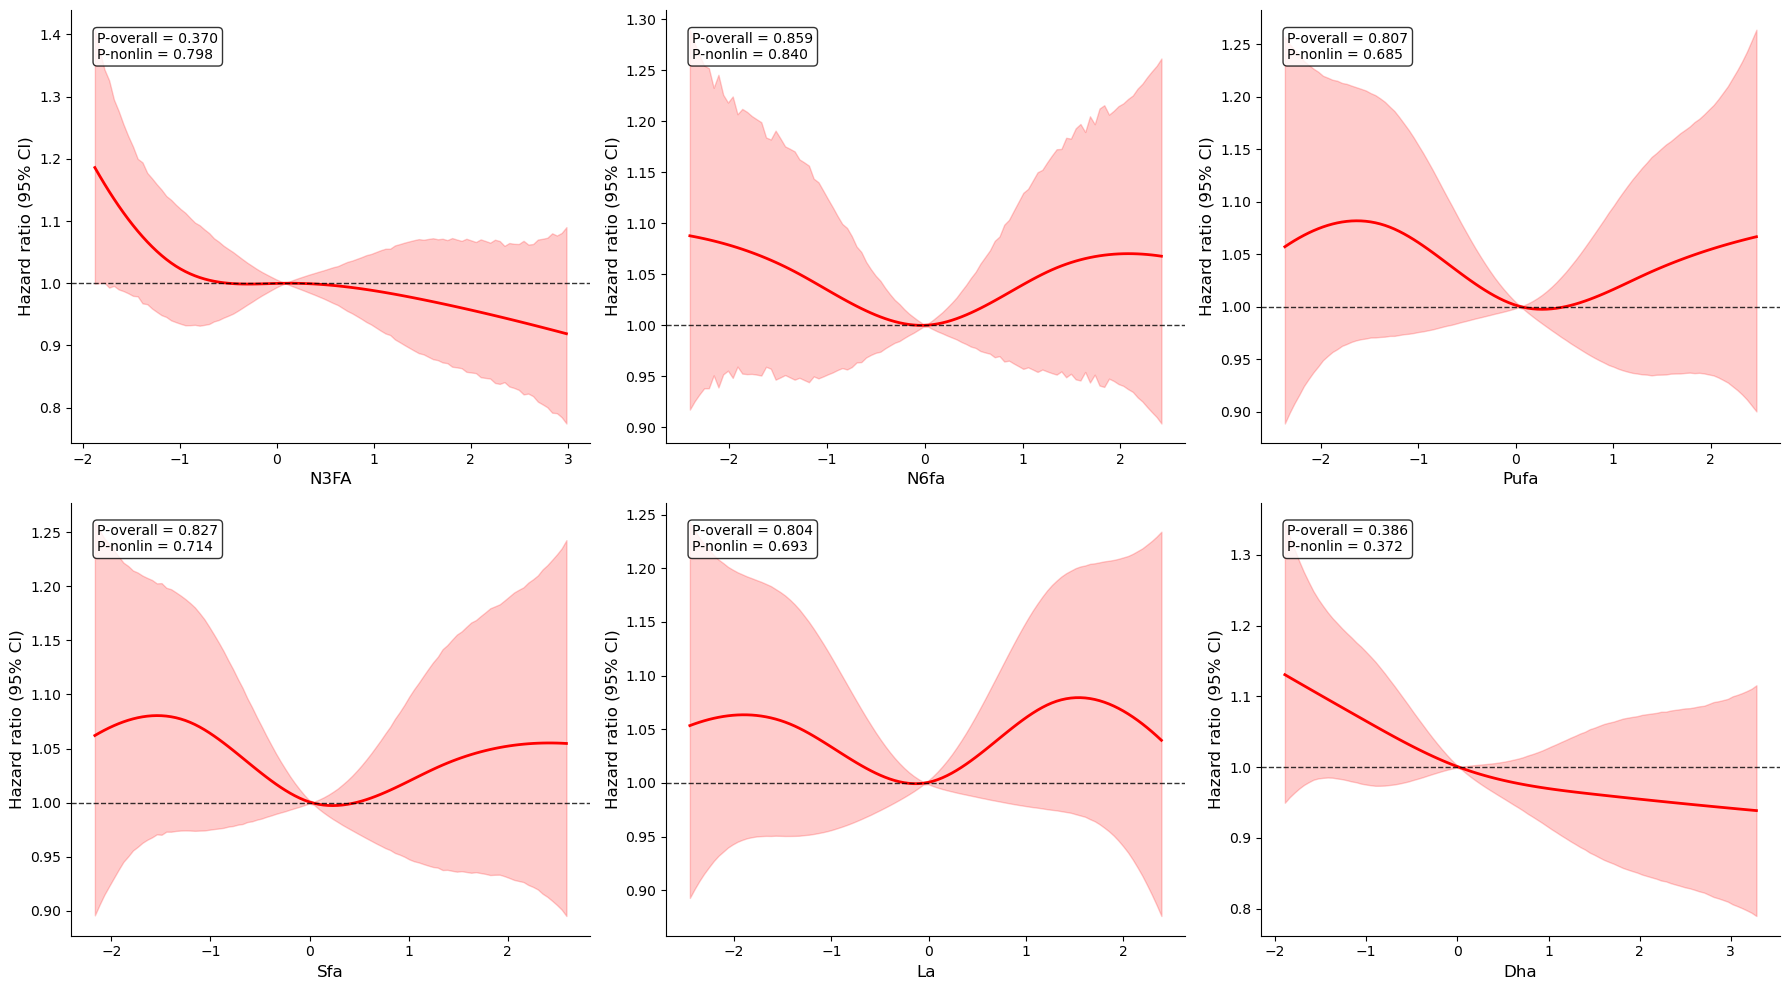

✅ 所有步骤运行成功，图像已保存。


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from statsmodels.duration.hazard_regression import PHReg
from scipy.stats import chi2
import warnings

warnings.filterwarnings("ignore")

# ======================================================
# 1. 核心定义：拟合 RCS 模型函数
# ======================================================
def fit_rcs_model(data, x_col, covariates, knots_count=3):
    """
    拟合带有限制性三次样条的 Cox 模型
    """
    # 提取需要的列并处理缺失值
    cols = [x_col, "time", "status"] + covariates
    temp_df = data[cols].dropna()
    
    x_vals = temp_df[x_col].values

    # --- 截断到 1%-99% 避免极端值影响 ---
    x_trunc = np.clip(x_vals, np.percentile(x_vals, 1), np.percentile(x_vals, 99))

    # 确定节点 (经典 Harrell 节点位置)
    knots = np.nanquantile(x_vals, [0.1, 0.50, 0.9])
    
    # 显式获取全局边界，防止后面计算参考点时报错
    lb, ub = x_vals.min(), x_vals.max()
    
    # 生成样条基函数公式
    # 必须在此处包含边界定义，确保后续 dmatrix 的基准一致
    formula_str = f"cr(x, knots={list(knots)}, lower_bound={lb}, upper_bound={ub}) - 1"
    spline_df = dmatrix(formula_str, {"x": x_vals}, return_type='dataframe')
    
    # 构建解释变量矩阵 (Exogenous matrix)
    exog = pd.concat([spline_df.reset_index(drop=True), 
                      temp_df[covariates].reset_index(drop=True)], axis=1)
    exog = exog.astype(float)
    
    # 拟合 PHReg (Cox 模型)
    model = PHReg(temp_df["time"].values, exog, status=temp_df["status"].values)
    res = model.fit()
    
    return res, knots, x_vals, lb, ub

# ======================================================
# 2. 自动预处理：转换分类变量为哑变量 (防止 ValueError)
# ======================================================
# 找出 Model 3 中所有非数值列
non_numeric_cols = df_matched[model3_vars].select_dtypes(exclude=[np.number]).columns.tolist()

if len(non_numeric_cols) > 0:
    df_rcs = pd.get_dummies(df_matched, columns=non_numeric_cols, drop_first=True)
else:
    df_rcs = df_matched.copy()

# 重新生成模型 3 的协变量列表 (替换掉原来的分类变量名为生成的 dummy 名)
final_model3_covs = []
for v in model3_vars:
    if v in non_numeric_cols:
        cols = [c for c in df_rcs.columns if c.startswith(v + "_")]
        final_model3_covs.extend(cols)
    else:
        if v in df_rcs.columns:
            final_model3_covs.append(v)

df_rcs[final_model3_covs] = df_rcs[final_model3_covs].astype(float)

# ======================================================
# 3. 循环绘图 (最终修复版：兼容数组类型 + 解决空白问题)
# ======================================================
plot_info = {
    "Omega 3 fatty acid": ("fatty_acids_n3", "N3FA"),
    "Omega 6 fatty acid": ("fatty_acids_n6", "N6fa"),
    "Polyunsaturated fatty acids": ("fatty_acids_pufa", "Pufa"),
    "Saturated fatty acids": ("fatty_acids_sfa", "Sfa"),
    "Linoleic acid": ("fatty_acids_la", "La"),
    "Docosahexaenoic acid": ("fatty_acids_dha", "Dha")
}

plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, (full_name, (col_name, abbr)) in enumerate(plot_info.items()):
    ax = plt.subplot(2, 3, i + 1)
    
    print(f"正在处理: {full_name} ...")
    
    # --- 1. 拟合模型 ---
    res, knots, x_vals, lb, ub = fit_rcs_model(df_rcs, col_name, final_model3_covs)
    
    # 获取样条系数索引
    idx_spline = [j for j, name in enumerate(res.model.exog_names) if 'cr(' in name]
    betas = res.params[idx_spline]
    
    # [修复1]：更稳健的写法。先获取完整协方差矩阵，如果是 DataFrame 则转为数组
    cov_all = res.cov_params()
    if hasattr(cov_all, 'values'): # 如果是 DataFrame
        cov_all = cov_all.values
    # 现在 cov_all 肯定是数组了，可以安全切片
    cov_matrix = cov_all[np.ix_(idx_spline, idx_spline)]
    
    # 计算 P 值
    try:
        p_overall = chi2.sf(betas @ np.linalg.inv(cov_matrix) @ betas, df=len(idx_spline))
        p_nonlin = chi2.sf(betas[1:] @ np.linalg.inv(cov_matrix[1:, 1:]) @ betas[1:], df=len(idx_spline)-1)
    except:
        p_overall = 1.0
        p_nonlin = 1.0

    # --- 2. 预测曲线 ---
    x_range = np.linspace(np.percentile(x_vals, 1), np.percentile(x_vals, 99), 100)
    ref_val = np.median(x_vals)
    
    formula_str = f"cr(x, knots={list(knots)}, lower_bound={lb}, upper_bound={ub}) - 1"
    
    # 生成预测矩阵
    dm_range = dmatrix(formula_str, {"x": x_range})
    dm_ref = dmatrix(formula_str, {"x": [ref_val]})
    
    diff = dm_range - dm_ref
    log_hr = diff @ betas
    
    # [修复2] 计算标准误时加上 abs()，防止微小的负值导致 sqrt 产生 NaN
    var_log_hr = np.diag(diff @ cov_matrix @ diff.T)
    se_log_hr = np.sqrt(np.abs(var_log_hr))
    
    hr = np.exp(log_hr)
    lower = np.exp(log_hr - 1.96 * se_log_hr)
    upper = np.exp(log_hr + 1.96 * se_log_hr)
    
    # 检查是否有 NaN 并打印警告
    if np.isnan(hr).any():
        print(f"⚠️ 警告: {full_name} 的计算结果包含 NaN，可能导致绘图空白。")

    # --- 3. 绘图 ---
    ax.plot(x_range, hr, color='red', lw=2)
    ax.fill_between(x_range, lower, upper, color='red', alpha=0.2)
    ax.axhline(1, color='black', linestyle='--', lw=1, alpha=0.8)
    
    ax.set_xlabel(abbr, fontsize=12)
    ax.set_ylabel("Hazard ratio (95% CI)", fontsize=12)
    
    # 显示 P 值
    p_text = f"P-overall = {p_overall:.3f}\nP-nonlin = {p_nonlin:.3f}"
    ax.text(0.05, 0.95, p_text, transform=ax.transAxes, fontsize=10, 
            verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # [修复3] 暂时注释掉强制 Y 轴限制，让它自动缩放，观察 LA 是否出现
    # y_max = min(upper.max(), 3.0) 
    # y_min = max(lower.min(), 0.2)
    # ax.set_ylim(y_min * 0.9, y_max * 1.1)
    
    print(f"   -> HR range: {hr.min():.2f} - {hr.max():.2f}")

plt.tight_layout()
plt.savefig("Cataract_RCS_Debug_Fixed_Final.png", dpi=300)
plt.show()

print("✅ 所有步骤运行成功，图像已保存。")

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math
import os
from matplotlib.backends.backend_pdf import PdfPages

# =========================
# Config - 可按需调整
# =========================
INPUT_FILE = "Subgroup_Cox_SAFE.xlsx"
OUTPUT_PDF = "Subgroup_forest_shift_down_one_row.pdf"
PNG_DIR = "fig_pages_png"
os.makedirs(PNG_DIR, exist_ok=True)

rows_per_page = 36          # 每页行数（含 header 行）
dpi = 150
row_height_inch = 0.24
header_height_inch = 1.0
min_fig_height = 6
page_width_inch = 14

# 字号
FONT_HEADER = 10   # 列标题与小图标题
FONT_TEXT = 7      # 左侧 Value/Subgroup/Number 文本
FONT_NUM = 6       # Beta / P 字体 & x-axis ticks

# Value 缩写映射（按你提供的映射）
fa_map = {
    "Omega 3 fatty acid": "n3fa",
    "Omega 6 fatty acid": "n6fa",
    "Polyunsaturated fatty acids": "pufa",
    "Monounsaturated fatty acids": "mufa",
    "Linoleic acid": "la",
    "Docosahexaenoic acid": "dha"
}

# 需要展示的 model 顺序（如数据没有某 model 会自动留空）
models = ['Model1', 'Model2', 'Model3']

# Marker & offsets（黑白）
marker_map = {'Model1': 's', 'Model2': 'o', 'Model3': '^'}
# 小横向偏移用于在同一行显示多个 model 的点（仅用于行内微小错开，单位为 data-y）
offsets = {'Model1': -0.18, 'Model2': 0.0, 'Model3': 0.18}

# =========================
# 读取数据 & 解析 Beta(95%CI)
# =========================
df = pd.read_excel(INPUT_FILE)

def parse_beta_ci(s):
    if pd.isna(s):
        return np.nan, np.nan, np.nan
    m = re.search(r'([-\d\.]+)\s*\(([-\d\.]+)\s*to\s*([-\d\.]+)\)', str(s))
    if m:
        try:
            return float(m.group(1)), float(m.group(2)), float(m.group(3))
        except:
            return np.nan, np.nan, np.nan
    return np.nan, np.nan, np.nan

# 若没有 Beta_95CI 列则会产生 NaN
if 'Beta_95CI' in df.columns:
    df[['Beta', 'CI_low', 'CI_high']] = df['Beta_95CI'].apply(lambda x: pd.Series(parse_beta_ci(x)))
else:
    df['Beta'] = np.nan
    df['CI_low'] = np.nan
    df['CI_high'] = np.nan

# 清理 Model 字段
if 'Model' in df.columns:
    df['Model'] = df['Model'].astype(str).str.replace(r'\s+', '', regex=True)
else:
    df['Model'] = ''

# =========================
# Pivot：以 Variable/Subgroup/Group 为 key 把不同 model 展平成一行
# =========================
pivot_cols = ['Beta', 'CI_low', 'CI_high', 'Beta_95CI', 'P_value', 'Interaction_P', 'N']
# 为了保险：在 pivot 之前确保这些列存在（不存在则添加）
for c in pivot_cols:
    if c not in df.columns:
        df[c] = np.nan

pt = df.pivot_table(index=['Variable', 'Subgroup', 'Group'],
                    columns='Model',
                    values=pivot_cols,
                    aggfunc='first')

if pt.shape[0] == 0:
    raise ValueError("未读取到数据，请检查 Excel 内容或列名是否正确。")

# 展平 multiindex 列
pt.columns = [f"{a}_{b}" for a, b in pt.columns]
pt = pt.reset_index()

# 添加缩写 Value 列 & 保底列
pt['Variable_abbr'] = pt['Variable'].map(fa_map).fillna(pt['Variable'])

# 确保每个 model 所需列存在
for m in models:
    for col in [f'Beta_{m}', f'CI_low_{m}', f'CI_high_{m}', f'Beta_95CI_{m}', f'P_value_{m}', f'Interaction_P_{m}']:
        if col not in pt.columns:
            pt[col] = np.nan

# 格式化显示列
for m in models:
    def fmt(r, m=m):
        try:
            if pd.isna(r[f'Beta_{m}']) or pd.isna(r[f'CI_low_{m}']) or pd.isna(r[f'CI_high_{m}']):
                return ""
            return f"{r[f'Beta_{m}']:.3f} ({r[f'CI_low_{m}']:.3f} to {r[f'CI_high_{m}']:.3f})"
        except Exception:
            return ""
    pt[f'{m}_display'] = pt.apply(fmt, axis=1)

# Interaction P common (优先用原表 Interaction_P 每组的第一个值)
if 'Interaction_P' in df.columns:
    pt['Interaction_P_common'] = df.groupby(['Variable', 'Subgroup', 'Group'])['Interaction_P'].first().values
else:
    pt['Interaction_P_common'] = np.nan

# N_total
n_cols = [c for c in pt.columns if c.startswith('N_')]
if n_cols:
    pt['N_total'] = pt[n_cols].max(axis=1)
elif 'N' in df.columns:
    pt['N_total'] = df.groupby(['Variable', 'Subgroup', 'Group'])['N'].first().values
else:
    pt['N_total'] = np.nan

# =========================
# 将 Subgroup 作为独立 header 行插入（header 行 Group='__HEADER__'）
# 这样 header 行会占用整行高度，避免挤压
# =========================
pt = pt.sort_values(['Variable_abbr', 'Subgroup', 'Group']).reset_index(drop=True)

rows = []
last_key = None

for _, r in pt.iterrows():
    key = (r['Variable_abbr'], r['Subgroup'])
    if key != last_key:
        header = r.copy()
        header['Group'] = '__HEADER__'
        header['N_total'] = np.nan
        # 清空 model 相关数值，确保 header 行不绘制任何点/线/数值
        for m in models:
            header[f'Beta_{m}'] = np.nan
            header[f'CI_low_{m}'] = np.nan
            header[f'CI_high_{m}'] = np.nan
            header[f'{m}_display'] = ""
            header[f'Interaction_P_{m}'] = np.nan
        rows.append(header)
        last_key = key
    rows.append(r)

pt = pd.DataFrame(rows).reset_index(drop=True)

# =========================
# 分页准备
# =========================
total_rows = len(pt)
pages = max(1, math.ceil(total_rows / rows_per_page))
print(f"Total rows after inserting headers: {total_rows}, rows_per_page: {rows_per_page}, pages: {pages}")

# 列宽分配（相对权重）
left_value_w = 0.08
left_sub_w = 0.12
left_n_w = 0.08
per_model_plot_w = 0.12
per_model_text_w = 0.25   # 增大以给 P 值更多空间
col_weights = [left_value_w, left_sub_w, left_n_w]
for _ in models:
    col_weights += [per_model_plot_w, per_model_text_w]
col_ratios = [w / sum(col_weights) for w in col_weights]

# =========================
# 生成 PDF & PNG（增加条纹背景）
# =========================
# 颜色设置：白色与淡灰交替
color_white = "#ffffff"
color_gray = "#f2f2f2"

with PdfPages(OUTPUT_PDF) as pdf:
    for pidx in range(pages):
        start = pidx * rows_per_page
        end = min(start + rows_per_page, total_rows)
        page_df = pt.iloc[start:end].copy().reset_index(drop=True)
        n_page = len(page_df)
        if n_page == 0:
            continue

        # y positions for data rows (data 坐标):  top->bottom integers
        page_df['y'] = np.arange(n_page, 0, -1)

        # 关键：定义唯一的行中心坐标 y_center（所有绘制元素基于它）
        page_df['y_center'] = page_df['y']

        # 动态高度
        fig_h = max(min_fig_height, header_height_inch + n_page * row_height_inch)
        fig = plt.figure(figsize=(page_width_inch, fig_h), dpi=dpi)
        gs = fig.add_gridspec(1, len(col_ratios), width_ratios=col_ratios, wspace=0.02)
        axes = [fig.add_subplot(gs[0, i]) for i in range(len(col_ratios))]

        # ---------- 去掉每个子图的黑色边框（spines / frame）
        for ax in axes:
            for spine in ax.spines.values():
                spine.set_visible(False)
            ax.patch.set_edgecolor('none')
            ax.set_facecolor('none')
            ax.set_frame_on(False)
            # 隐藏坐标但保留绘图区域
            ax.tick_params(axis='both', which='both', length=0)
            ax.set_xticks([])
            ax.set_yticks([])
            # 统一 y 范围，并反转（与之前行为一致）
            ax.set_ylim(0.5, n_page + 0.5)
            ax.invert_yaxis()

        # 左侧三列坐标
        ax_value, ax_sub, ax_N = axes[0], axes[1], axes[2]
        # 每个 model 有 plot axis + text axis
        model_plot_axes = []
        model_text_axes = []
        for i, m in enumerate(models):
            axp = axes[3 + 2*i]
            axt = axes[3 + 2*i + 1]
            model_plot_axes.append(axp)
            model_text_axes.append(axt)

        # ---------- 绘制条纹背景（在 data 坐标系上绘制每一行背景色）
        for i_row, y in enumerate(page_df['y_center'].tolist()):
            # 交替颜色：从白色开始（第一行白色）
            color = color_white if (i_row % 2 == 0) else color_gray
            yb = y - 0.5
            yt = y + 0.5
            # 在每个列的 axis 上绘制相同的横条（data 坐标）
            for ax in axes:
                ax.axhspan(yb, yt, color=color, zorder=0)

        # ---------- 顶部列标题（每页）
        ax_value.text(0.01, 1.02, "Value", transform=ax_value.transAxes, fontsize=FONT_HEADER, fontweight='bold', va='top', ha='left')
        ax_sub.text(0.01, 1.02, "Subgroup", transform=ax_sub.transAxes, fontsize=FONT_HEADER, fontweight='bold', va='top', ha='left')
        ax_N.text(0.01, 1.02, "Number", transform=ax_N.transAxes, fontsize=FONT_HEADER, fontweight='bold', va='top', ha='left')

        # per-model headers and text headers (P heading positioned right)
        for i, m in enumerate(models):
            axp = model_plot_axes[i]
            axt = model_text_axes[i]
            # model name above plot
            axp.text(0.5, 1.02, m, transform=axp.transAxes, fontsize=FONT_HEADER, fontweight='bold', va='top', ha='center')
            # text axis headers
            axt.text(0.00, 1.02, "Beta (95%CI)", transform=axt.transAxes, fontsize=FONT_HEADER, fontweight='bold', va='top', ha='left')
            axt.text(0.75, 1.02, "P value", transform=axt.transAxes, fontsize=FONT_HEADER, fontweight='bold', va='top', ha='left')

        # ---------- 写左侧文本（Value / Subgroup / Number）
        for _, row in page_df.iterrows():
            y = row['y_center']   # 使用行中心
            # 将 data y -> axes 坐标（0..1）
            y_norm = (y - 0.5) / n_page

            # Value 显示缩写
            ax_value.text(0.01, y_norm, str(row['Variable_abbr']), transform=ax_value.transAxes,
                          fontsize=FONT_TEXT, va='center', ha='left', zorder=5)

            # Subgroup: header 行单独显示（粗体）；数据行显示 Group（缩进）
            if row['Group'] == '__HEADER__':
                ax_sub.text(0.01, y_norm, str(row['Subgroup']), transform=ax_sub.transAxes,
                            fontsize=FONT_TEXT, fontweight='bold', va='center', ha='left', zorder=6)
            else:
                ax_sub.text(0.03, y_norm, str(row['Group']), transform=ax_sub.transAxes,
                            fontsize=FONT_TEXT, va='center', ha='left', zorder=5)

            # Number 列（数据行显示，header 行为空）
            Nval = "" if pd.isna(row['N_total']) else f"{int(row['N_total'])}"
            ax_N.text(0.01, y_norm, Nval, transform=ax_N.transAxes,
                      fontsize=FONT_TEXT, va='center', ha='left', zorder=5)

        # ---------- 绘制每个 model 的 plot 与文本（文本与线在条纹上方）
        for mi, m in enumerate(models):
            axp = model_plot_axes[mi]
            axt = model_text_axes[mi]

            # 计算本页该 model 的 x 范围（只基于非 header 的可用 CI）
            valid = page_df[page_df['Group'] != '__HEADER__']
            lows = valid[f'CI_low_{m}'].dropna().tolist() if f'CI_low_{m}' in valid.columns else []
            highs = valid[f'CI_high_{m}'].dropna().tolist() if f'CI_high_{m}' in valid.columns else []
            if lows and highs:
                # 加一点边距
                xmin = min(lows) - (abs(min(lows)) + abs(max(highs))) * 0.03 - 0.01
                xmax = max(highs) + (abs(min(lows)) + abs(max(highs))) * 0.03 + 0.01
            else:
                xmin, xmax = -0.5, 0.5
            axp.set_xlim(xmin, xmax)
            axp.axvline(0, color='black', linestyle='--', linewidth=0.7, zorder=6)
            axp.tick_params(axis='x', labelsize=FONT_NUM)
            axp.set_yticks([])

            # 绘制每行（跳过 header 行），并把点/线设为高 zorder
            for _, row in page_df.iterrows():
                y = row['y_center']
                if row['Group'] == '__HEADER__':
                    continue

                b = row.get(f'Beta_{m}', np.nan)
                lo = row.get(f'CI_low_{m}', np.nan)
                hi = row.get(f'CI_high_{m}', np.nan)
                if not (pd.isna(b) or pd.isna(lo) or pd.isna(hi)):
                    # ====== 这里是关键：把森林图往下一行移动一整行 ======
                    # 目标位置 = 当前行中心 y_center - 1（即下一行的中心，data 坐标）
                    y_shifted = y + 1.0
                    # 再加上 very small model 内偏移，系数小以免跨行
                    y_draw = y_shifted + offsets.get(m, 0.0) * 0.25
                    # 防止越界（确保绘制在可见区间内）
                    y_draw = float(np.clip(y_draw, 0.5, n_page + 0.5))
                    # 绘制 CI 与点
                    axp.hlines(y_draw, lo, hi, linewidth=1.0, color='black', zorder=7)
                    mk = marker_map.get(m, 's')
                    axp.plot(b, y_draw, marker=mk, markersize=5, markeredgecolor='black', markerfacecolor='black', zorder=8)

                # write Beta & P (text axis) — 文字仍然绘制在本行中心（不随森林图移动）
                y_norm = (y - 0.5) / n_page
                beta_disp = row.get(f'{m}_display', "")
                # P value preference: model-specific Interaction_P_{m} if exists else common
                inter_col = f'Interaction_P_{m}'
                if inter_col in row and not pd.isna(row[inter_col]):
                    inter_val = row[inter_col]
                else:
                    inter_val = row.get('Interaction_P_common', np.nan)
                pdisp = "" if pd.isna(inter_val) else f"{inter_val:.3f}"
                axt.text(0.00, y_norm, str(beta_disp), transform=axt.transAxes,
                         fontsize=FONT_NUM, va='center', ha='left', zorder=9)
                axt.text(0.75, y_norm, pdisp, transform=axt.transAxes,
                         fontsize=FONT_NUM, va='center', ha='left', zorder=9)

        # 页眉与保存
        fig.suptitle(f"Subgroup forest plot (Page {pidx+1}/{pages})", fontsize=12)
        plt.tight_layout(rect=[0, 0, 1, 0.95])

        # 保存
        pdf.savefig(fig)
        png_path = os.path.join(PNG_DIR, f'page_{pidx+1:03d}.png')
        fig.savefig(png_path, dpi=300, bbox_inches='tight')
        print(f"Saved page {pidx+1}/{pages} -> PDF page and {png_path}")
        plt.close(fig)

print(f"Finished. PDF: {OUTPUT_PDF}; PNGs in folder: {PNG_DIR}")


Total rows after inserting headers: 36, rows_per_page: 36, pages: 1
Saved page 1/1 -> PDF page and fig_pages_png\page_001.png
Finished. PDF: Subgroup_forest_shift_down_one_row.pdf; PNGs in folder: fig_pages_png


## 相互作用

In [37]:
import pandas as pd
from lifelines import CoxPHFitter

# ==============================================================================
# 1. 假设你已经完成了读取和映射
# ==============================================================================
# df = pd.read_csv(...) 
# df = df.rename(...)
# 建立副本
df_model = df.copy()

# ==============================================================================
# 2. 准备 Model 3 的所有协变量
# ==============================================================================
vars_model1 = ["age_baseline", "sex", "ethnic_background"]

vars_model2 = vars_model1 + [
    "bmi_baseline", 
    "alcohol_frequency_baseline", 
    "smoking_status_baseline", 
    "education_baseline"
]

vars_model3 = vars_model2 + [
    "diabetes_baseline",
    "hypertension_baseline",
    "heart_disease_composite",
    "glaucoma_baseline",
    "depression_baseline"
]

# ==============================================================================
# 3. 构建核心变量与交互项
# ==============================================================================
core_var = "fatty_acids_dha"

# 构建交互项
df_model['interaction_dha_age'] = df_model['fatty_acids_dha'] * df_model['age_baseline']
df_model['interaction_dha_sex'] = df_model['fatty_acids_dha'] * df_model['sex']

# 最终入模变量
final_covariates = list(set([core_var, 'interaction_dha_age', 'interaction_dha_sex'] + vars_model3))

# ==============================================================================
# 4. 数据清洗与提取
# ==============================================================================
time_col = "followup_duration_cataract_yrs"
event_col = "cataract_incident"
cols_to_use = final_covariates + [time_col, event_col]

# 检查缺失列
missing = [c for c in cols_to_use if c not in df_model.columns]
if missing:
    print(f"❌ 错误：以下列未找到：{missing}")
else:
    print("✅ 变量检查通过。")

cox_data = df_model[cols_to_use].dropna()
print(f"最终样本量: {len(cox_data)}")

# ==============================================================================
# 5. 运行 Cox 回归 (Model 3 + Interaction)
# ==============================================================================
cph = CoxPHFitter()

try:
    print("\n正在拟合 Cox 模型...")
    cph.fit(cox_data, duration_col=time_col, event_col=event_col)
    
    # ==============================================================================
    # 6. 生成结果表 (自动适配列名)
    # ==============================================================================
    summary = cph.summary
    
    # 打印原始列名，方便调试
    # print("原始列名:", summary.columns.tolist())
    
    # 1. 自动寻找置信区间列名 (兼容不同版本)
    # 通常是 'lower 0.95', 'upper 0.95' 或者 'coef lower 95%', 'coef upper 95%'
    lower_col = [c for c in summary.columns if 'lower' in c.lower()][0]
    upper_col = [c for c in summary.columns if 'upper' in c.lower()][0]
    
    # 2. 提取关键列
    # 注意：我们要看 HR 的置信区间，lifelines summary 通常给的是 coef 的区间
    # 如果 summary 里有 'exp(coef) lower ...' 最好，如果没有，我们就先展示 coef 的
    # 这里为了通用，我们直接提取存在的列
    
    target_cols = ['exp(coef)', 'se(coef)', 'z', 'p', lower_col, upper_col]
    res = summary[target_cols]
    
    # 3. 重命名，使其易读
    res.columns = ['Haz. Ratio', 'Std. Err.', 'z', 'P value', 'CI Lower', 'CI Upper']
    
    print("\n【分析结果】Model 3 + Age*DHA Interaction")
    print("-" * 100)
    pd.set_option('display.float_format', lambda x: '%.4f' % x)
    print(res)
    print("-" * 100)
    
    # 检查交互项
    if 'interaction_n3fa_age' in res.index:
        pval = res.loc['interaction_dha_age', 'P value']
        hr = res.loc['interaction_dha_age', 'Haz. Ratio']
        print(f"\n交互项 (interaction_dha_age): HR = {hr:.4f}, P = {pval:.4f}")

except Exception as e:
    print(f"模型运行出错: {e}")
    # 如果还是出错，直接打印整个 summary
    print("\n尝试打印原始 Summary:")
    try:
        print(cph.summary)
    except:
        pass

✅ 变量检查通过。
最终样本量: 34624

正在拟合 Cox 模型...

【分析结果】Model 3 + Age*DHA Interaction
----------------------------------------------------------------------------------------------------
                            Haz. Ratio  Std. Err.       z  P value  CI Lower  \
covariate                                                                      
smoking_status_baseline         1.0306     0.0260  1.1586   0.2466   -0.0208   
fatty_acids_dha                 0.5715     0.1890 -2.9600   0.0031   -0.9299   
heart_disease_composite         1.1726     0.0679  2.3460   0.0190    0.0262   
alcohol_frequency_baseline      1.0206     0.0110  1.8501   0.0643   -0.0012   
sex                             0.7194     0.0369 -8.9292   0.0000   -0.4016   
hypertension_baseline           1.1467     0.0361  3.7925   0.0001    0.0662   
interaction_dha_sex             1.0018     0.0344  0.0530   0.9577   -0.0655   
age_baseline                    1.1213     0.0030 38.3497   0.0000    0.1086   
education_baseline     

In [38]:
import pandas as pd
from lifelines import CoxPHFitter

# ==============================================================================
# 1. 假设你已经完成了读取和映射
# ==============================================================================
# df = pd.read_csv(...) 
# df = df.rename(...)
# 建立副本
df_model = df.copy()

# ==============================================================================
# 2. 准备 Model 3 的所有协变量
# ==============================================================================
vars_model1 = ["age_baseline", "sex", "ethnic_background"]

vars_model2 = vars_model1 + [
    "bmi_baseline", 
    "alcohol_frequency_baseline", 
    "smoking_status_baseline", 
    "education_baseline"
]

vars_model3 = vars_model2 + [
    "diabetes_baseline",
    "hypertension_baseline",
    "heart_disease_composite",
    "glaucoma_baseline",
    "depression_baseline"
]

# ==============================================================================
# 3. 构建核心变量与交互项
# ==============================================================================
core_var = "fatty_acids_n3"

# 构建交互项
df_model['interaction_n3fa_age'] = df_model['fatty_acids_n3'] * df_model['age_baseline']
df_model['interaction_n3fa_sex'] = df_model['fatty_acids_n3'] * df_model['sex']

# 最终入模变量
final_covariates = list(set([core_var, 'interaction_n3fa_age', 'interaction_n3fa_sex'] + vars_model3))

# ==============================================================================
# 4. 数据清洗与提取
# ==============================================================================
time_col = "followup_duration_cataract_yrs"
event_col = "cataract_incident"
cols_to_use = final_covariates + [time_col, event_col]

# 检查缺失列
missing = [c for c in cols_to_use if c not in df_model.columns]
if missing:
    print(f"❌ 错误：以下列未找到：{missing}")
else:
    print("✅ 变量检查通过。")

cox_data = df_model[cols_to_use].dropna()
print(f"最终样本量: {len(cox_data)}")

# ==============================================================================
# 5. 运行 Cox 回归 (Model 3 + Interaction)
# ==============================================================================
cph = CoxPHFitter()

try:
    print("\n正在拟合 Cox 模型...")
    cph.fit(cox_data, duration_col=time_col, event_col=event_col)
    
    # ==============================================================================
    # 6. 生成结果表 (自动适配列名)
    # ==============================================================================
    summary = cph.summary
    
    # 打印原始列名，方便调试
    # print("原始列名:", summary.columns.tolist())
    
    # 1. 自动寻找置信区间列名 (兼容不同版本)
    # 通常是 'lower 0.95', 'upper 0.95' 或者 'coef lower 95%', 'coef upper 95%'
    lower_col = [c for c in summary.columns if 'lower' in c.lower()][0]
    upper_col = [c for c in summary.columns if 'upper' in c.lower()][0]
    
    # 2. 提取关键列
    # 注意：我们要看 HR 的置信区间，lifelines summary 通常给的是 coef 的区间
    # 如果 summary 里有 'exp(coef) lower ...' 最好，如果没有，我们就先展示 coef 的
    # 这里为了通用，我们直接提取存在的列
    
    target_cols = ['exp(coef)', 'se(coef)', 'z', 'p', lower_col, upper_col]
    res = summary[target_cols]
    
    # 3. 重命名，使其易读
    res.columns = ['Haz. Ratio', 'Std. Err.', 'z', 'P value', 'CI Lower', 'CI Upper']
    
    print("\n【分析结果】Model 3 + Age*N3FA Interaction")
    print("-" * 100)
    pd.set_option('display.float_format', lambda x: '%.4f' % x)
    print(res)
    print("-" * 100)
    
    # 检查交互项
    if 'interaction_n3fa_age' in res.index:
        pval = res.loc['interaction_n3fa_age', 'P value']
        hr = res.loc['interaction_n3fa_age', 'Haz. Ratio']
        print(f"\n交互项 (interaction_n3fa_age): HR = {hr:.4f}, P = {pval:.4f}")

except Exception as e:
    print(f"模型运行出错: {e}")
    # 如果还是出错，直接打印整个 summary
    print("\n尝试打印原始 Summary:")
    try:
        print(cph.summary)
    except:
        pass

✅ 变量检查通过。
最终样本量: 34622

正在拟合 Cox 模型...

【分析结果】Model 3 + Age*N3FA Interaction
----------------------------------------------------------------------------------------------------
                            Haz. Ratio  Std. Err.       z  P value  CI Lower  \
covariate                                                                      
smoking_status_baseline         1.0326     0.0260  1.2338   0.2173   -0.0189   
heart_disease_composite         1.1718     0.0679  2.3358   0.0195    0.0255   
alcohol_frequency_baseline      1.0224     0.0110  2.0194   0.0434    0.0007   
sex                             0.7269     0.0365 -8.7286   0.0000   -0.3905   
hypertension_baseline           1.1473     0.0361  3.8059   0.0001    0.0667   
age_baseline                    1.1207     0.0030 38.1520   0.0000    0.1081   
interaction_n3fa_age            1.0058     0.0029  1.9898   0.0466    0.0001   
fatty_acids_n3                  0.6862     0.1840 -2.0473   0.0406   -0.7372   
education_baseline    